# Setup

## Mount Google Drive

In [177]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [178]:
ROOT_FOLDER = "/content/drive/MyDrive/Colab Notebooks/Machine_Learning/EDA_project/Datasets"

## Importing necessary libraries & dataset

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import missingno as msno
from matplotlib.ticker import FuncFormatter


In [180]:
# Loading data into a DataFrame with the specified encoding
data = pd.read_csv(f'{ROOT_FOLDER}/Most Streamed Spotify Songs 2024.csv', encoding='latin-1')

# Display the first few rows of the DataFrame
data.head()

Track                    Album Name          Artist  \
0         MILLION DOLLAR BABY  Million Dollar Baby - Single   Tommy Richman   
1                 Not Like Us                   Not Like Us  Kendrick Lamar   
2  i like the way you kiss me    I like the way you kiss me         Artemas   
3                     Flowers              Flowers - Single     Miley Cyrus   
4                     Houdini                       Houdini          Eminem   

  Release Date          ISRC All Time Rank  Track Score Spotify Streams  \
0    4/26/2024  QM24S2402528             1        725.4     390,470,936   
1     5/4/2024  USUG12400910             2        545.9     323,703,884   
2    3/19/2024  QZJ842400387             3        538.4     601,309,283   
3    1/12/2023  USSM12209777             4        444.9   2,031,280,633   
4    5/31/2024  USUG12403398             5        423.3     107,034,922   

  Spotify Playlist Count Spotify Playlist Reach  ...  SiriusXM Spins  \
0                 30,716            196,631,588  ...             684   
1                 28,113            174,597,137  ...               3   
2                 54,331            211,607,669  ...             536   
3                269,802            136,569,078  ...           2,182   
4                  7,223            151,469,874  ...               1   

  Deezer Playlist Count Deezer Playlist Reach Amazon Playlist Count  \
0                  62.0            17,598,718                 114.0   
1                  67.0            10,422,430                 111.0   
2                 136.0            36,321,847                 172.0   
3                 264.0            24,684,248                 210.0   
4                  82.0            17,660,624                 105.0   

  Pandora Streams Pandora Track Stations Soundcloud Streams  Shazam Counts  \
0      18,004,655                 22,931          4,818,457      2,669,262   
1       7,780,028                 28,444          6,623,075      1,118,279   
2       5,022,621                  5,639          7,208,651      5,285,340   
3     190,260,277                203,384                NaN     11,822,942   
4       4,493,884                  7,006            207,179        457,017   

  TIDAL Popularity Explicit Track  
0              NaN              0  
1              NaN              1  
2              NaN              0  
3              NaN              0  
4              NaN              1  

[5 rows x 29 columns]

# Data Exploration

## Check all the columns

In [181]:
data.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'],
      dtype='object')

## Check shape of the imported datasets


In [182]:
data.shape
print(f"Dataset has {data.shape[0]} data points and {data.shape[1]} features.")

Dataset has 4600 data points and 29 features.


## Check for missing values

In [183]:
# Calculating the number of missing values in each column and sort them in descending order
missing_value_fields = data.isnull().sum().sort_values(ascending=False)

# Displaying the sorted missing values
missing_value_fields

TIDAL Popularity              4600
Soundcloud Streams            3333
SiriusXM Spins                2123
Pandora Track Stations        1268
TikTok Posts                  1173
Pandora Streams               1106
Amazon Playlist Count         1055
YouTube Playlist Reach        1009
TikTok Views                   981
TikTok Likes                   980
Deezer Playlist Reach          928
Deezer Playlist Count          921
Spotify Popularity             804
Shazam Counts                  577
Apple Music Playlist Count     561
AirPlay Spins                  498
YouTube Likes                  315
YouTube Views                  308
Spotify Streams                113
Spotify Playlist Reach          72
Spotify Playlist Count          70
Artist                           5
Track                            0
Album Name                       0
Track Score                      0
All Time Rank                    0
ISRC                             0
Release Date                     0
Explicit Track                   0
dtype: int64

### **Insights** :
Focus on analyzing 'Track', 'Album Name', 'Track Score', 'All Time Rank', and 'ISRC' as they have no missing values, while considering data imputation or removal for columns with high missing values like 'TIDAL Popularity' and 'Soundcloud Streams'.

In [184]:
# Reorder the columns in the DataFrame based on the number of missing values, from highest to lowest
data_reordered = data[missing_value_fields.index]

# Displaying the first few rows of the reordered DataFrame
data_reordered

TIDAL Popularity Soundcloud Streams SiriusXM Spins  \
0                  NaN          4,818,457            684   
1                  NaN          6,623,075              3   
2                  NaN          7,208,651            536   
3                  NaN                NaN          2,182   
4                  NaN            207,179              1   
...                ...                ...            ...   
4595               NaN         50,633,006            NaN   
4596               NaN                NaN            NaN   
4597               NaN                NaN            NaN   
4598               NaN                NaN            NaN   
4599               NaN                NaN            NaN   

     Pandora Track Stations TikTok Posts Pandora Streams  \
0                    22,931    5,767,700      18,004,655   
1                    28,444      674,700       7,780,028   
2                     5,639    3,025,400       5,022,621   
3                   203,384    7,189,811     190,260,277   
4                     7,006       16,400       4,493,884   
...                     ...          ...             ...   
4595                 13,184       48,370      20,104,066   
4596                    NaN          NaN             NaN   
4597                 28,999        7,596      84,426,740   
4598                    NaN       11,433       6,817,840   
4599                 11,320       78,000      69,006,739   

      Amazon Playlist Count YouTube Playlist Reach    TikTok Views  \
0                     114.0            150,597,040   5,332,281,936   
1                     111.0            156,380,351     208,339,025   
2                     172.0            373,784,955   3,369,120,610   
3                     210.0          3,351,188,582  14,603,725,994   
4                     105.0            112,763,851             NaN   
...                     ...                    ...             ...   
4595                    NaN                 53,016     143,934,379   
4596                    NaN             24,973,048          19,935   
4597                    6.0             29,253,152      36,849,005   
4598                    7.0             25,150,516      37,757,301   
4599                    4.0            175,831,376      70,196,388   

       TikTok Likes  ... Spotify Playlist Reach  Spotify Playlist Count  \
0       651,565,900  ...            196,631,588                  30,716   
1        35,223,547  ...            174,597,137                  28,113   
2       275,154,237  ...            211,607,669                  54,331   
3     1,078,757,968  ...            136,569,078                 269,802   
4               NaN  ...            151,469,874                   7,223   
...             ...  ...                    ...                     ...   
4595     20,202,000  ...              5,103,054                  65,770   
4596          1,721  ...              1,449,767                   4,602   
4597      5,288,677  ...              6,704,802                  72,066   
4598      2,534,831  ...              7,387,064                  14,037   
4599     10,055,461  ...             14,066,526                  32,138   

              Artist                            Track  \
0      Tommy Richman              MILLION DOLLAR BABY   
1     Kendrick Lamar                      Not Like Us   
2            Artemas       i like the way you kiss me   
3        Miley Cyrus                          Flowers   
4             Eminem                          Houdini   
...              ...                              ...   
4595     $uicideboy$                For the Last Time   
4596      Atif Aslam                 Dil Meri Na Sune   
4597        Lil Baby            Grace (feat. 42 Dugg)   
4598    Arijit Singh              Nashe Si Chadh Gayi   
4599       Arcï¿½ï¿½  Me Acostumbre (feat. Bad Bunny)   

                            Album Name Track Score All Time Rank  \
0         Million Dollar Baby - Single       725.4             1   
1

<Figure size 1200x800 with 0 Axes>

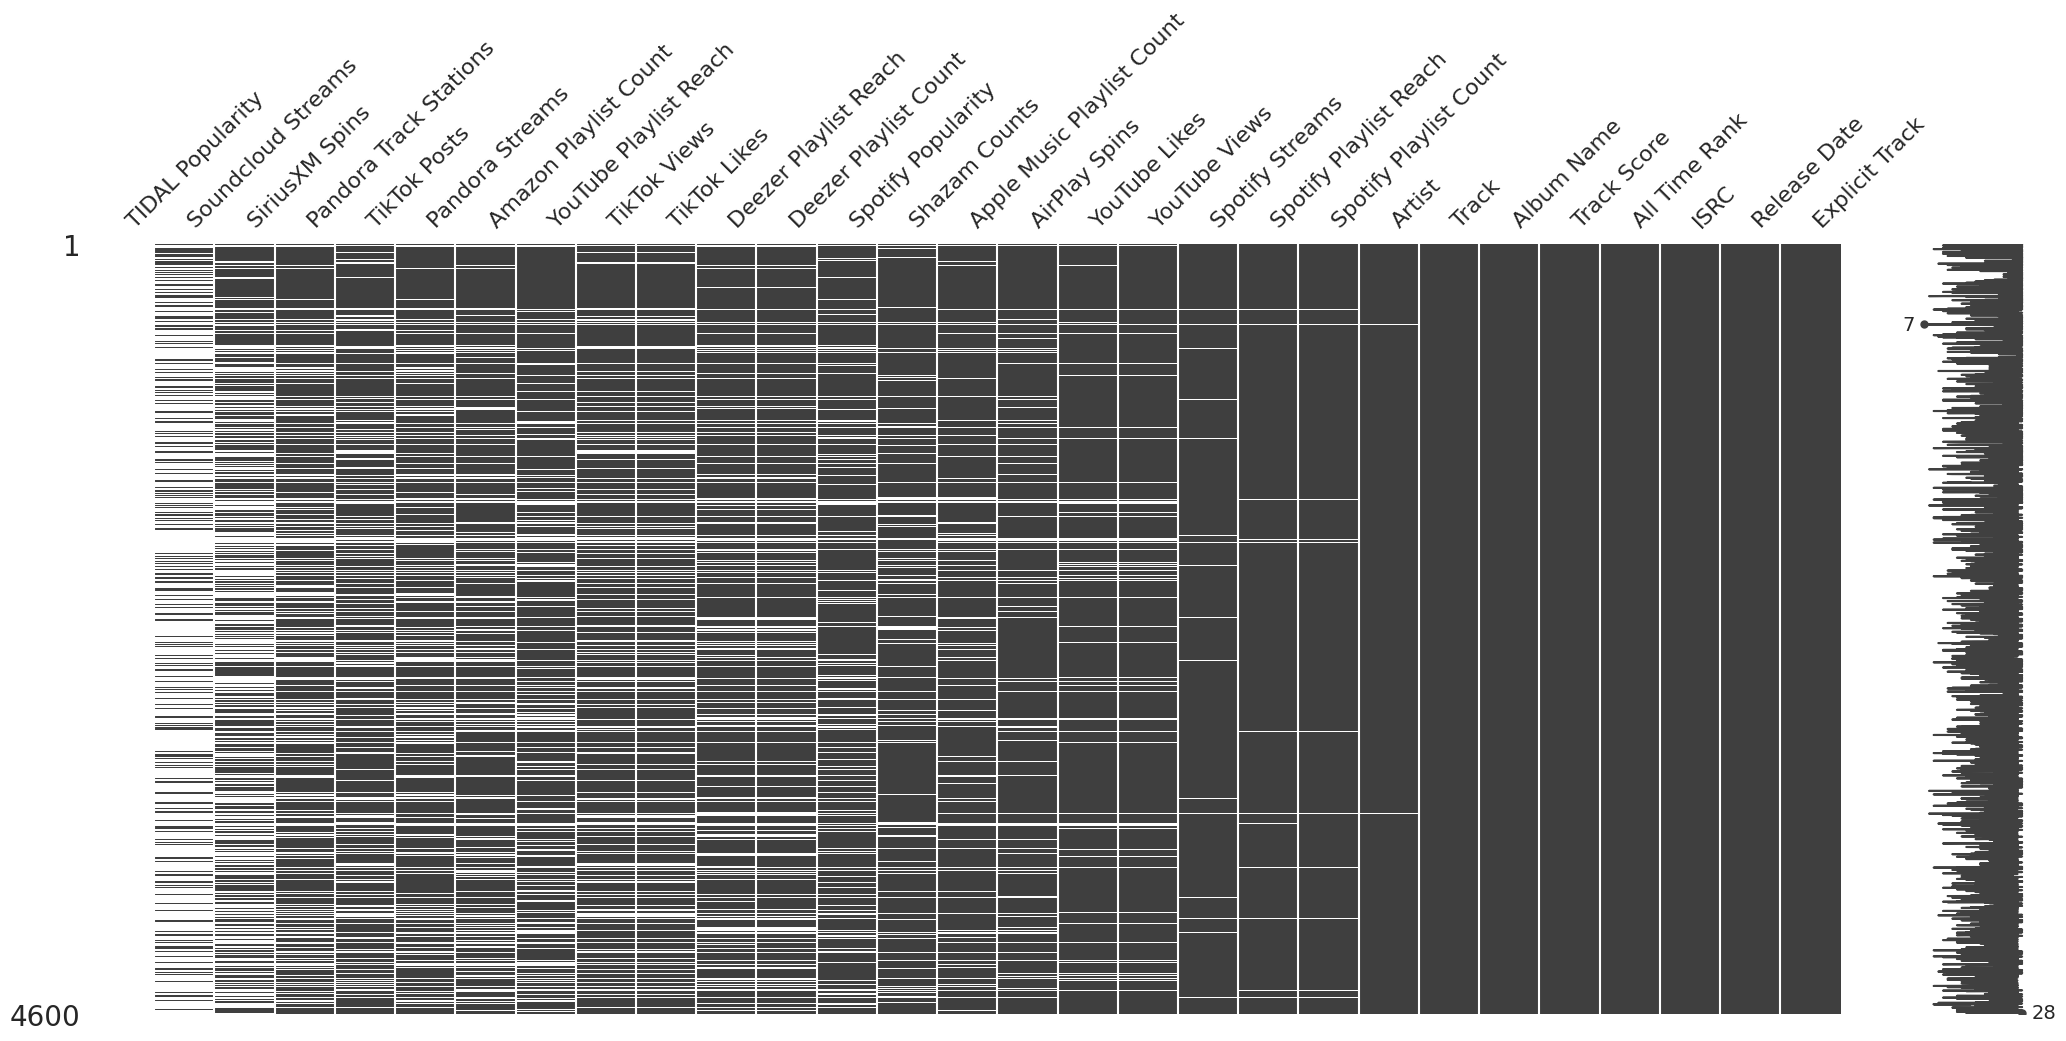

In [185]:
# Creating a missingno matrix plot
plt.figure(figsize=(12, 8))
ax = msno.matrix(data_reordered)
plt.show()

### **Insights** :
Columns like TIDAL Popularity, Soundcloud Streams, and SiriusXM Spins have a high percentage of missing data, whereas Track, Album Name, Track Score, All Time Rank, ISRC, and Release Date are fully complete and reliable. Prioritize analysis on the complete columns and consider imputing or addressing the substantial gaps in the others.

## Drop unnecessary fields

In [186]:
# Drop unnecessary columns with high missing values
data.drop(columns=['Soundcloud Streams', 'TIDAL Popularity', 'SiriusXM Spins'], axis=1, inplace=True)

# Check the shape of the DataFrame to confirm the changes
print(data.shape)

(4600, 26)


In [187]:
# Display concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

### **Insights** :
The dataset is mostly complete for key identifiers and metrics like Track, Album Name, and ISRC.

Some columns still have a moderate number of missing values (e.g., Spotify Streams, TikTok Posts), which may require imputation or specific handling.

The data types are appropriate for the nature of the data, with categorical data as objects and numerical data as floats/integers.

## Convert the datatypes

In [188]:
# Function to clean and convert columns to numeric
def clean_and_convert_columns(df, columns):
    for col in columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.replace(',', '').astype('float64')
    return df


# List of columns to convert
numeric_columns_to_convert = ['All Time Rank'	,'Track Score',
    'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
    'YouTube Views', 'YouTube Likes', 'TikTok Views', 'TikTok Posts',
    'TikTok Likes', 'YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins',
    'Deezer Playlist Count', 'Deezer Playlist Reach','Pandora Streams','Pandora Track Stations','Shazam Counts'
]


#Convert the data types of the specified columns
data = clean_and_convert_columns(data, numeric_columns_to_convert)

# Display concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   float64
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   float64
 8   Spotify Playlist Count      4530 non-null   float64
 9   Spotify Playlist Reach      4528 non-null   float64
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   float64
 12  YouTube Likes               4285 non-null   float64
 13  TikTok Posts                3427 

In [189]:
# Convert the 'Release Date' column to datetime format
data['Release Date'] = pd.to_datetime(data['Release Date'], errors='coerce')

In [190]:
# Identify categorical features by selecting columns with object data type
cat_feature = [column for column in data.columns if data[column].dtypes == "O"]
cat_feature  # Display the list of categorical features

# Identify numerical features by selecting columns with non-object data type
num_feature = [column for column in data.columns if data[column].dtype != "O"]
cat_feature, num_feature  # Display the lists of categorical and numerical features


(['Track', 'Album Name', 'Artist', 'ISRC'],
 ['Release Date',
  'All Time Rank',
  'Track Score',
  'Spotify Streams',
  'Spotify Playlist Count',
  'Spotify Playlist Reach',
  'Spotify Popularity',
  'YouTube Views',
  'YouTube Likes',
  'TikTok Posts',
  'TikTok Likes',
  'TikTok Views',
  'YouTube Playlist Reach',
  'Apple Music Playlist Count',
  'AirPlay Spins',
  'Deezer Playlist Count',
  'Deezer Playlist Reach',
  'Amazon Playlist Count',
  'Pandora Streams',
  'Pandora Track Stations',
  'Shazam Counts',
  'Explicit Track'])

In [191]:
# Fill missing values in numerical features
for col in num_feature:
    if data[col].dtype in ['float64', 'int64']:
        data[col] = data[col].fillna(data[col].mean())  # Fill missing values with the mean for numeric columns
    else:
        data[col] = data[col].fillna(data[col].mode()[0])  # Fill missing values with the mode for non-numeric columns


In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4600 non-null   object        
 1   Album Name                  4600 non-null   object        
 2   Artist                      4595 non-null   object        
 3   Release Date                4600 non-null   datetime64[ns]
 4   ISRC                        4600 non-null   object        
 5   All Time Rank               4600 non-null   float64       
 6   Track Score                 4600 non-null   float64       
 7   Spotify Streams             4600 non-null   float64       
 8   Spotify Playlist Count      4600 non-null   float64       
 9   Spotify Playlist Reach      4600 non-null   float64       
 10  Spotify Popularity          4600 non-null   float64       
 11  YouTube Views               4600 non-null   float64     

### Insights :
The data is now mostly complete and ready for further analysis, with the majority of columns containing no missing values.

Numeric columns have been converted to float64, facilitating numerical analysis.

## Remove duplicate records

In [193]:
# Calculate and display the number of duplicated rows in the DataFrame
data.duplicated().sum()

2

In [194]:
# Drop duplicate rows, keeping the first occurrence
data.drop_duplicates(keep='first',inplace=True)

# Calculate and display the number of duplicated rows remaining in the DataFrame
data.duplicated().sum()

0

## Check correlation b/w Numeric fields

In [195]:
# Calculate the correlation matrix for numerical features
corr_matrix = data[num_feature].corr()

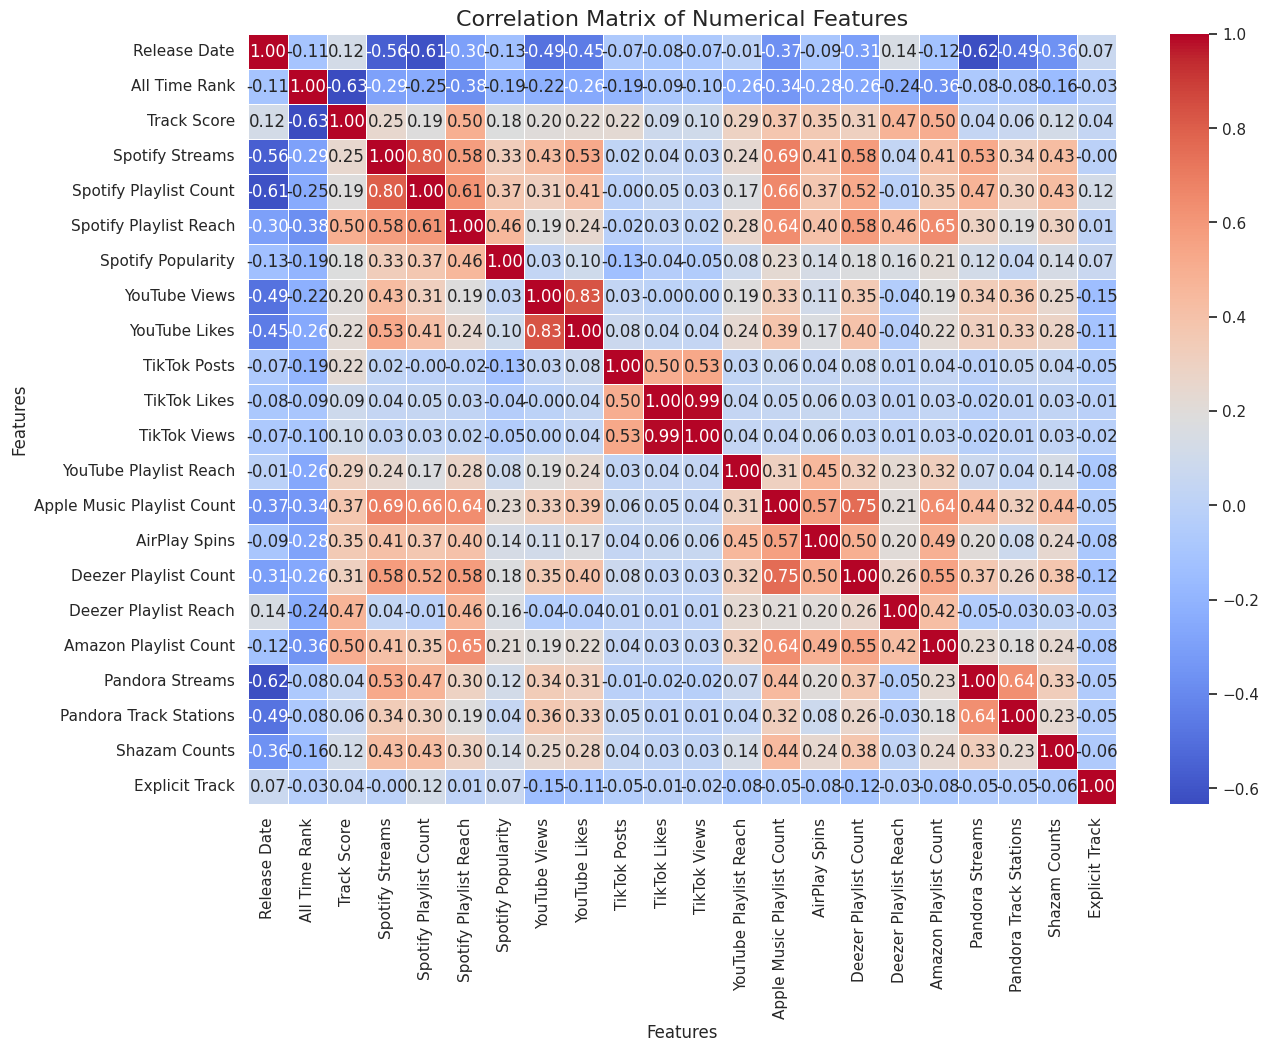

In [196]:
# Create a heatmap plot
plt.figure(figsize=(14, 10))  # Set the size of the plot
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, linecolor='white')

# Add titles and labels
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Show the plot
plt.show()


### **Insights** :
Strong Positive Correlations: TikTok Likes, TikTok Views, and TikTok Posts exhibit very high positive correlations with each other (close to 1), indicating that these metrics tend to move together.

Moderate Positive Correlations: Spotify Streams, Spotify Playlist Count, and Spotify Playlist Reach show moderate positive correlations (0.4 to 0.6), suggesting some degree of interdependence.

Negative Correlations: All Time Rank has a strong negative correlation with Track Score (-0.63), implying that as one increases, the other tends to decrease significantly.

## Creating new fields

In [197]:
# Total Streams
data['Total Streams'] = data[['Spotify Streams', 'YouTube Views', 'Pandora Streams','TikTok Views']].sum(axis=1)

# Total Likes
data['Total Likes'] = data[['YouTube Likes', 'TikTok Likes']].sum(axis=1)

# Total Playlist Count
data['Total Playlist Count'] = data[['Spotify Playlist Count', 'Apple Music Playlist Count', 'Deezer Playlist Count', 'Amazon Playlist Count']].sum(axis=1)

# Total Playlist Reach
data['Total Playlist Reach'] = data[['Spotify Playlist Reach', 'Deezer Playlist Reach', 'YouTube Playlist Reach']].sum(axis=1)

# Release Year
data['Release Year'] = pd.DatetimeIndex(data['Release Date']).year

# Spotify Engagement Ratio
data['Spotify Engagement Ratio'] = data['Spotify Streams'] / data['Total Streams']

# YouTube Engagement Ratio
data['YouTube Engagement Ratio'] = data['YouTube Views'] / data['Total Streams']

data.head()

Track                    Album Name          Artist  \
0         MILLION DOLLAR BABY  Million Dollar Baby - Single   Tommy Richman   
1                 Not Like Us                   Not Like Us  Kendrick Lamar   
2  i like the way you kiss me    I like the way you kiss me         Artemas   
3                     Flowers              Flowers - Single     Miley Cyrus   
4                     Houdini                       Houdini          Eminem   

  Release Date          ISRC  All Time Rank  Track Score  Spotify Streams  \
0   2024-04-26  QM24S2402528            1.0        725.4     3.904709e+08   
1   2024-05-04  USUG12400910            2.0        545.9     3.237039e+08   
2   2024-03-19  QZJ842400387            3.0        538.4     6.013093e+08   
3   2023-01-12  USSM12209777            4.0        444.9     2.031281e+09   
4   2024-05-31  USUG12403398            5.0        423.3     1.070349e+08   

   Spotify Playlist Count  Spotify Playlist Reach  ...  \
0                 30716.0             196631588.0  ...   
1                 28113.0             174597137.0  ...   
2                 54331.0             211607669.0  ...   
3                269802.0             136569078.0  ...   
4                  7223.0             151469874.0  ...   

   Pandora Track Stations  Shazam Counts  Explicit Track  Total Streams  \
0                 22931.0      2669262.0               0   5.825032e+09   
1                 28444.0      1118279.0               1   6.561700e+08   
2                  5639.0      5285340.0               0   4.098052e+09   
3                203384.0     11822942.0               0   1.792137e+10   
4                  7006.0       457017.0               1   1.350061e+09   

    Total Likes  Total Playlist Count  Total Playlist Reach  Release Year  \
0  6.532790e+08               31102.0          3.648273e+08          2024   
1  3.871029e+07               28479.0          3.413999e+08          2024   
2  2.773830e+08               54829.0          6.217145e+08          2024   
3  1.089388e+09              270670.0          3.512442e+09          2023   
4  1.163077e+08                7592.0          2.818943e+08          2024   

   Spotify Engagement Ratio  YouTube Engagement Ratio  
0                  0.067033                  0.014468  
1                  0.493323                  0.177312  
2                  0.146731                  0.029916  
3                  0.113344                  0.061162  
4                  0.079282                  0.057311  

[5 rows x 33 columns]

## Univariate Analysis

### Different Streams Analysis

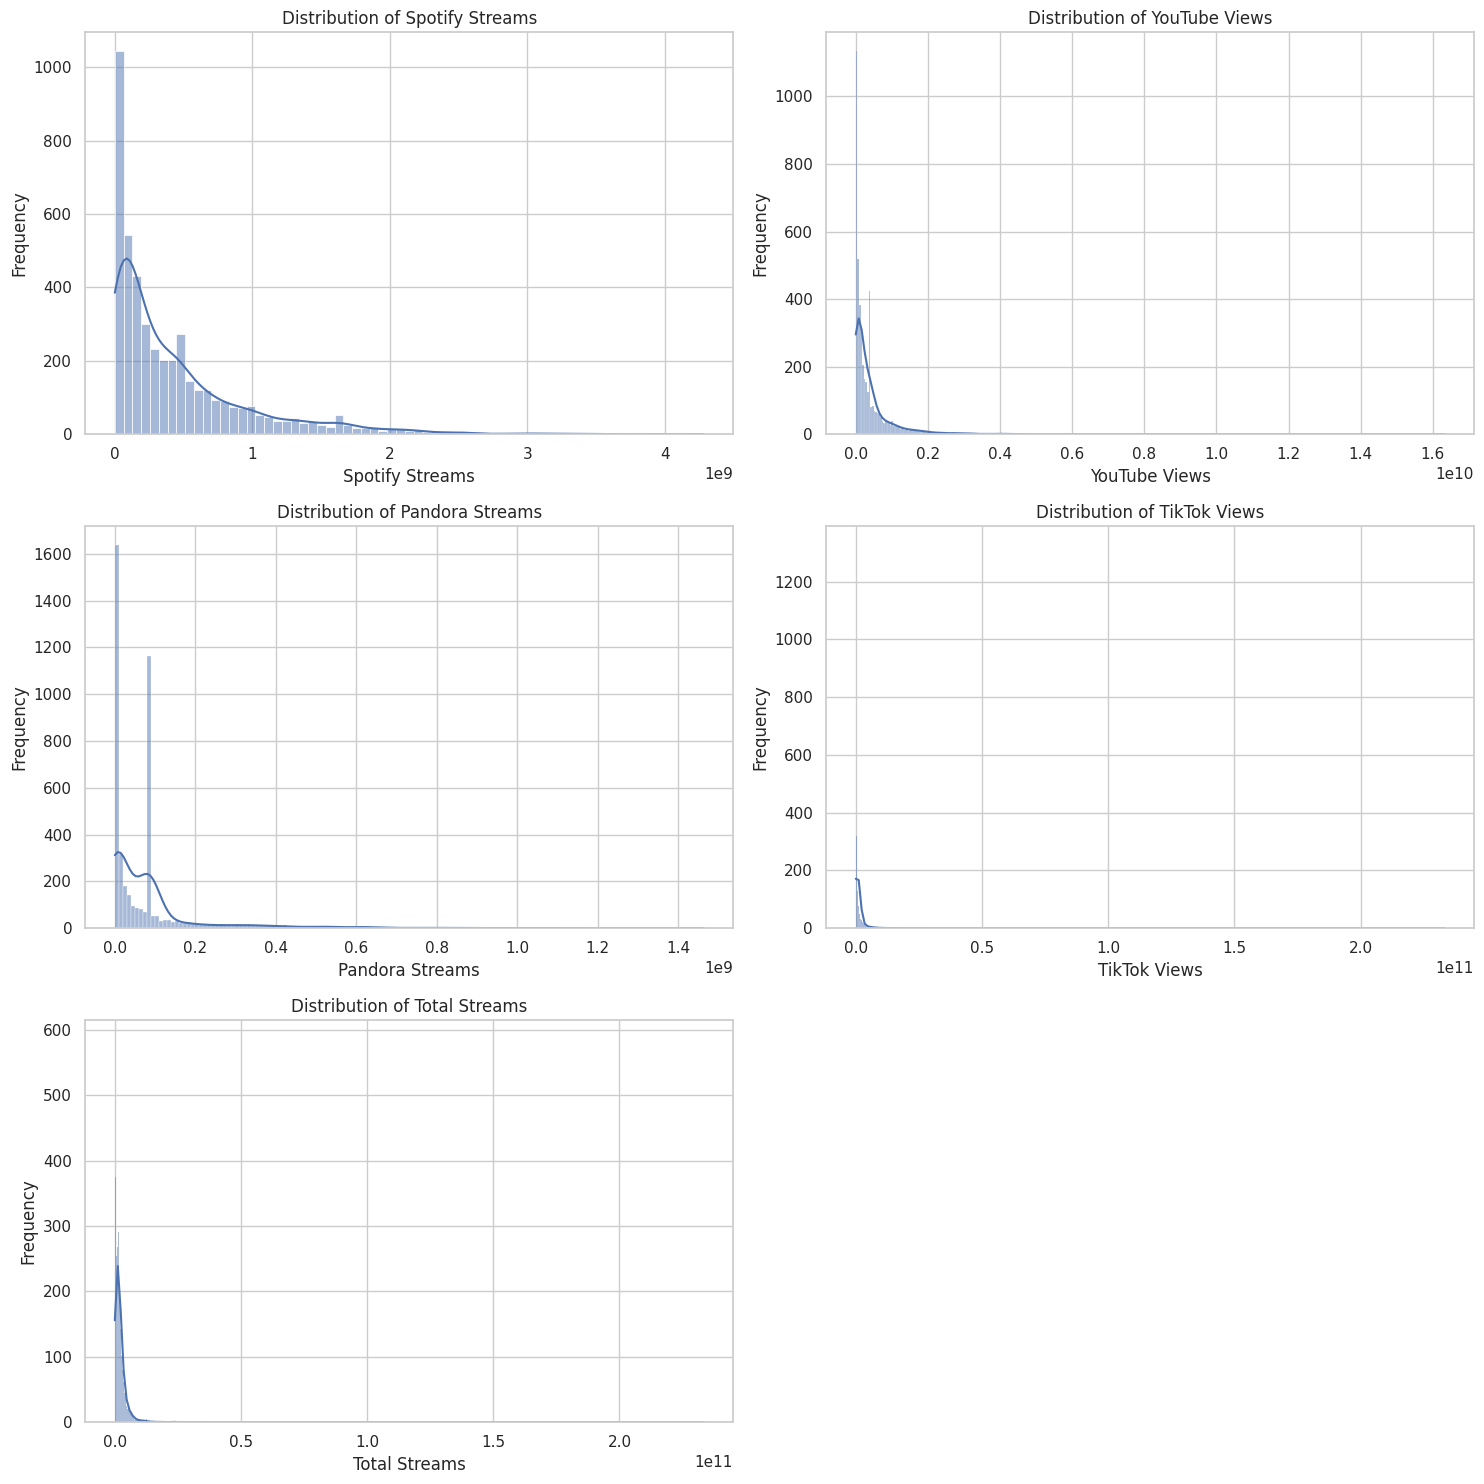

In [198]:
# Define the columns to plot
columns_to_plot = ['Spotify Streams', 'YouTube Views', 'Pandora Streams', 'TikTok Views', 'Total Streams']

# Set up the figure and axis
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(columns_to_plot):
    sns.histplot(data[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove the unused subplot
fig.delaxes(axes[-1])

# Adjust the layout
plt.tight_layout()
plt.show()


#### **Insights** :
Right Skewness:All distributions (Spotify Streams, YouTube Views, Pandora Streams, TikTok Views, and Total Streams) exhibit a right skew, indicating that most tracks have lower stream counts, with a few having exceptionally high counts.

Frequency Peaks at Low Values:The highest frequency of tracks is clustered at the lower stream count values, highlighting that the majority of tracks receive fewer streams.

### Track Score Analysis

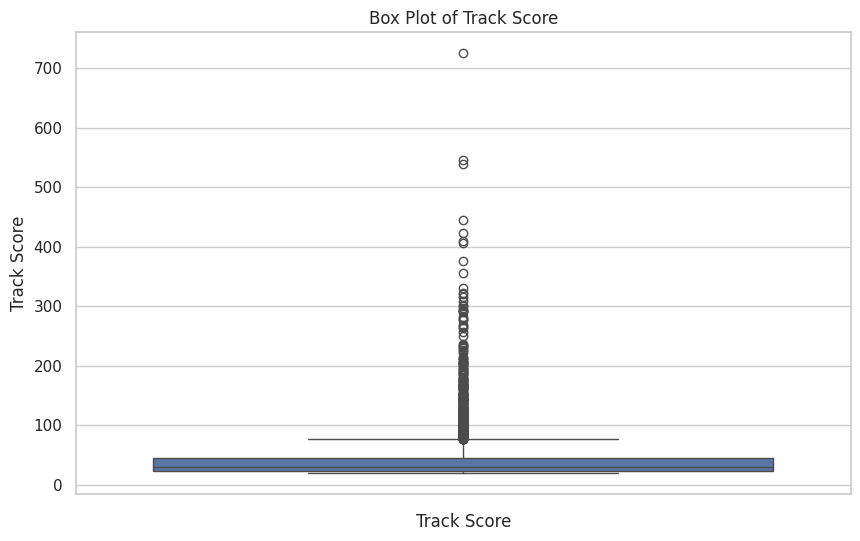

In [199]:
# Create a box plot for 'Track Score'
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.boxplot(data['Track Score'])  # Create the box plot for the 'Track Score' column
plt.title('Box Plot of Track Score')  # Add a title to the plot
plt.xlabel('Track Score')  # Add a label to the x-axis
plt.show()  # Display the plot

#### **Insights** :
Most track scores are clustered in a lower range.

There are many high outliers, indicating a few tracks with exceptionally high scores.

The distribution is right-skewed, implying higher average scores due to these outliers.

###  Most Frequent Artists Analysis

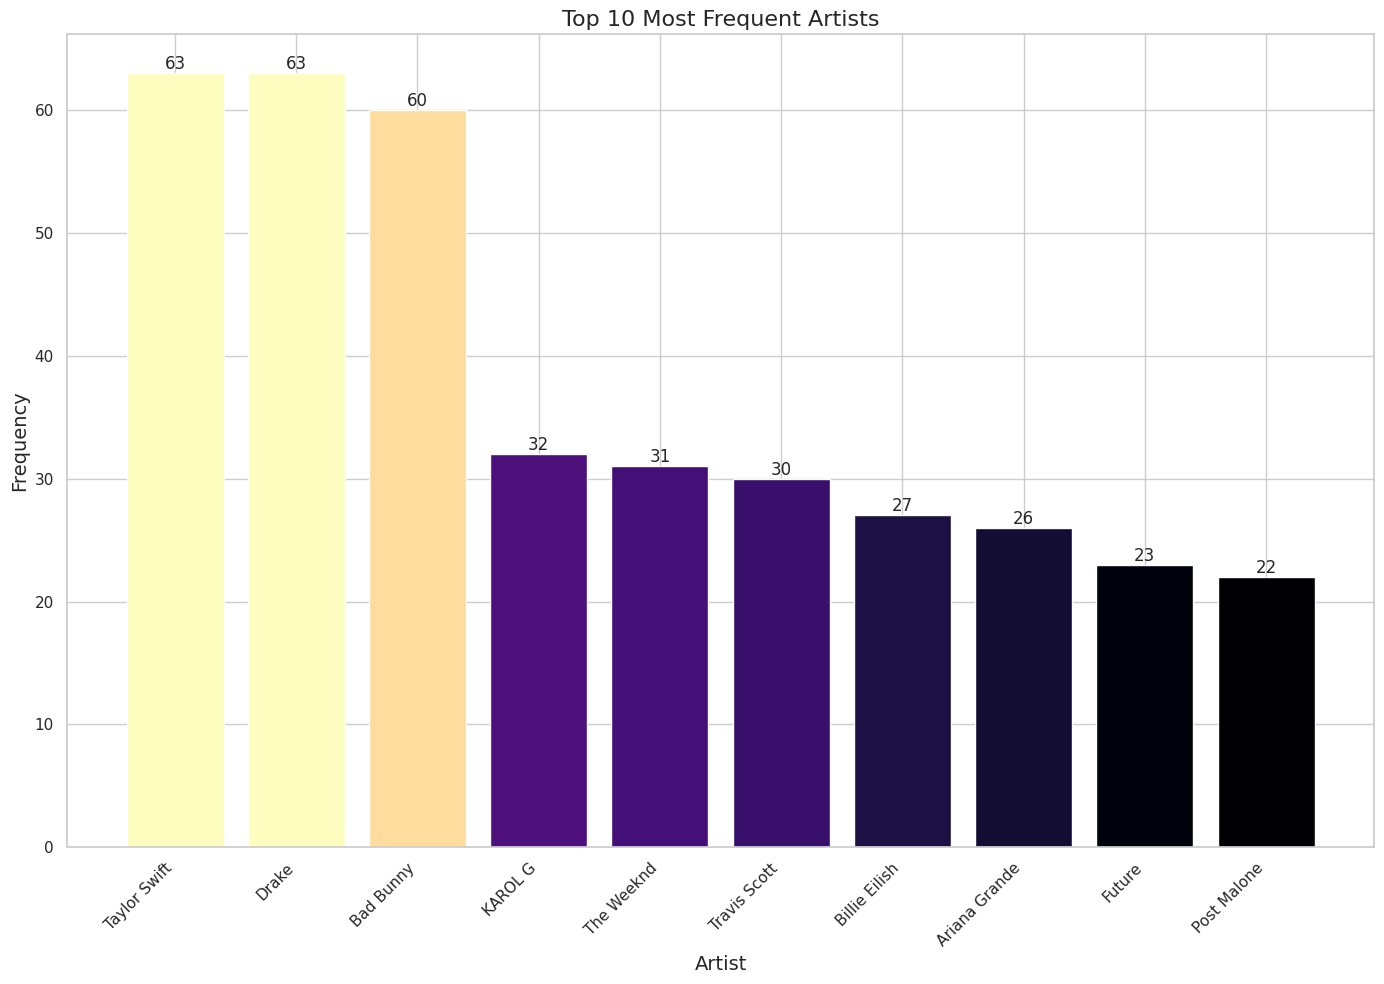

In [200]:
# Frequency distribution for 'Artist'
artist_counts = data['Artist'].value_counts()

# Set the style and color palette
sns.set(style="whitegrid")
cmap = plt.get_cmap("magma")  # Use a colormap

# Normalize data to the range [0, 1] for colormap
norm = plt.Normalize(artist_counts.head(10).values.min(), artist_counts.head(10).values.max())
colors = cmap(norm(artist_counts.head(10).values))

# Bar plot for 'Artist' frequency with colors based on frequency
plt.figure(figsize=(14, 10))
bars = plt.bar(artist_counts.head(10).index, artist_counts.head(10).values, color=colors)

# Add value annotations on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, f'{height}', ha='center', va='bottom', fontsize=12)

plt.title('Top 10 Most Frequent Artists', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



#### **Insights** :
Taylor Swift, Drake, and Bad Bunny dominate the list with the highest frequencies, indicating their strong presence and popularity.

There is a noticeable gap between the top three artists and the rest, suggesting that these three artists have a particularly high number of tracks or appearances compared to others.

## Bivariate Analysis

### Artist by Track Count Analysis

<ipython-input-201-4f8e960f75e3>:10: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.barplot(data=top_artists_streams, x='Track', y='Artist', hue='Explicit Track', palette=palette, dodge=True)


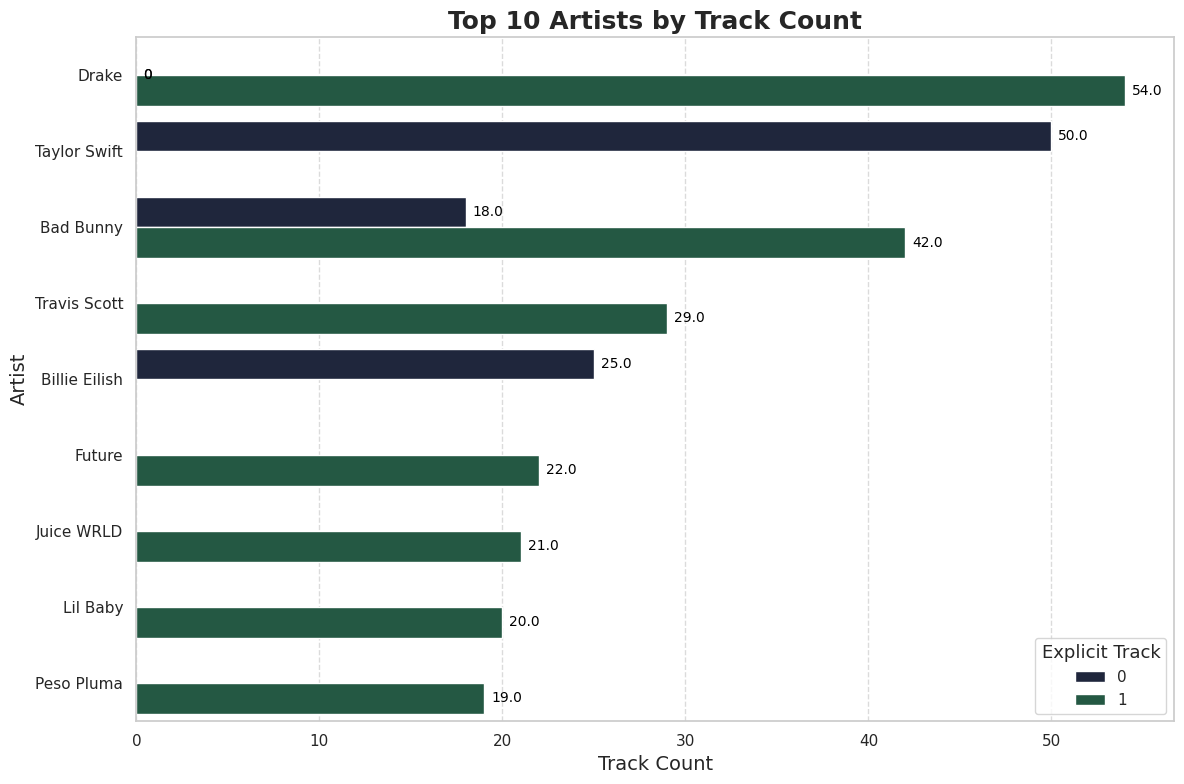

In [201]:
# Set the style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("cubehelix")

# Prepare data
top_artists_streams = data.groupby(['Artist', 'Explicit Track'])['Track'].count().nlargest(10).reset_index()

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=top_artists_streams, x='Track', y='Artist', hue='Explicit Track', palette=palette, dodge=True)

# Add annotations on bars
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0), textcoords='offset points', fontsize=10, color='black')

# Customize the plot
plt.title('Top 10 Artists by Track Count', fontsize=18, fontweight='bold')
plt.xlabel('Track Count', fontsize=14)
plt.ylabel('Artist', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Explicit Track', title_fontsize='13', fontsize='11')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


#### **Insights** :
Dominance of Explicit Tracks: Explicit tracks are predominant among the top artists, particularly for Drake, Travis Scott, and Future.

Non-Explicit Content: Taylor Swift and Billie Eilish are the leading artists with non-explicit content.

Variety in Track Count: There is a notable variety in the number of tracks released by these artists, with Drake leading significantly in explicit tracks.

### Artist by Total Stream Analysis

<ipython-input-202-9c3d33c7d393>:10: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.barplot(data=top_artists_streams, x='Artist', y='Total Streams', hue='Explicit Track', palette=palette, dodge=True)


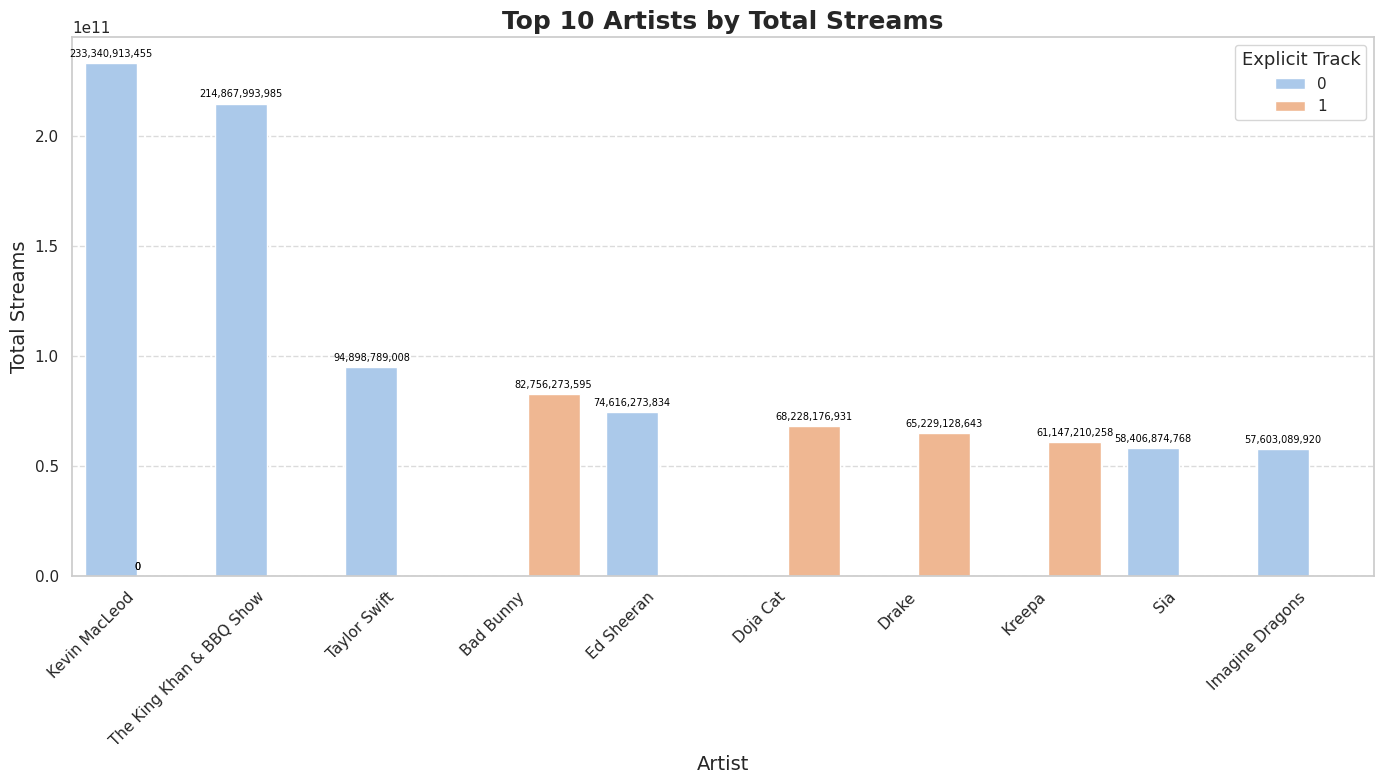

In [202]:
# Set the style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("pastel")

# Prepare data
plt.figure(figsize=(14, 8))
top_artists_streams = data.groupby(['Artist', 'Explicit Track'])['Total Streams'].sum().nlargest(10).reset_index()

# Create the vertical bar plot
ax = sns.barplot(data=top_artists_streams, x='Artist', y='Total Streams', hue='Explicit Track', palette=palette, dodge=True)

# Add annotations on bars
for p in ax.patches:
    height = p.get_height()
    # Adjust the position based on the height of the bar and the size of the plot
    ax.annotate(f'{height:,.0f}',
                (p.get_x() + p.get_width() / 2., height + 5000),  # Offset the annotation above the bar
                ha='center', va='bottom',
                xytext=(0, 3), textcoords='offset points', fontsize=7, color='black')

# Customize the plot
plt.title('Top 10 Artists by Total Streams', fontsize=18, fontweight='bold')
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Total Streams', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Explicit Track', title_fontsize='13', fontsize='11')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability

# Show the plot
plt.show()


#### **Insights** :
Dominance of Non-Explicit Tracks: The top positions are held by artists with non-explicit content.

Strong Presence of Explicit Tracks: Bad Bunny, Doja Cat, Drake, and Kreepa have significant streams from explicit tracks, indicating their popularity.

### Artist by Total Likes Analysis

<ipython-input-203-b15270b65d2b>:10: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.barplot(data=top_artists_likes, x='Total Likes', y='Artist', hue='Explicit Track', palette=palette, dodge=True)


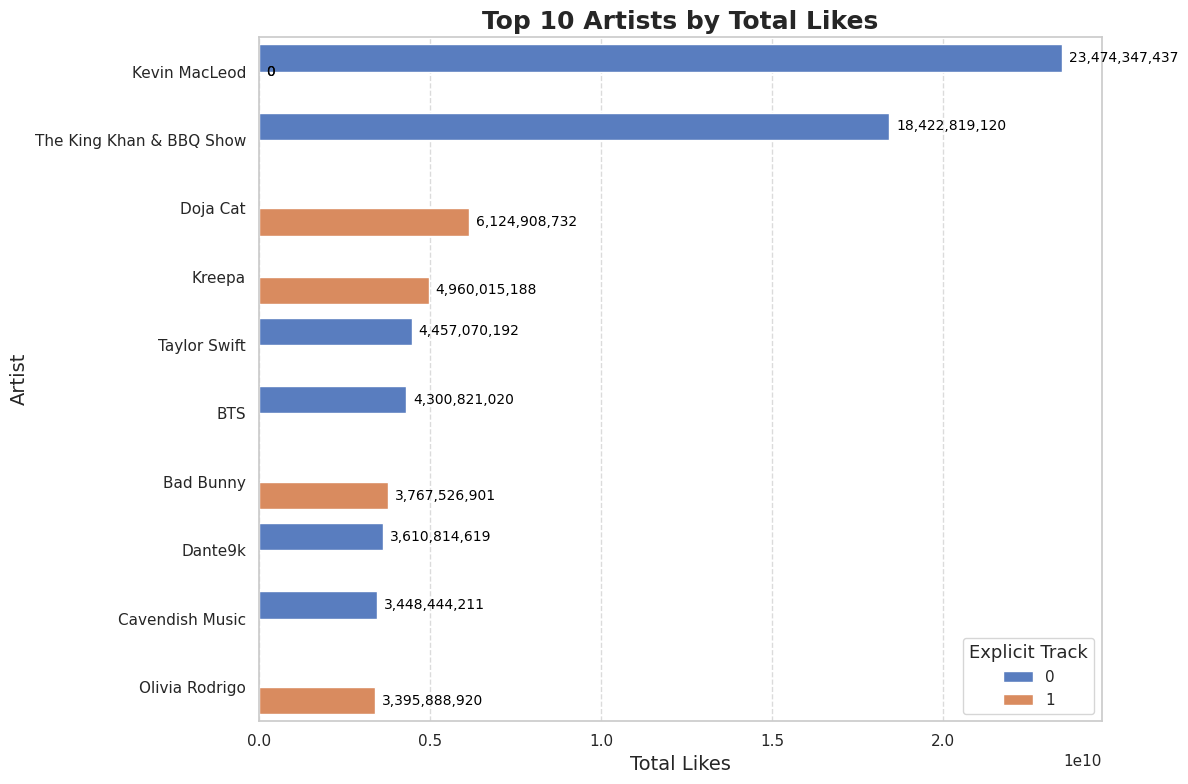

In [203]:
# Set the style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("muted")

# Prepare data
top_artists_likes = data.groupby(['Artist', 'Explicit Track'])['Total Likes'].sum().nlargest(10).reset_index()

# Create a bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=top_artists_likes, x='Total Likes', y='Artist', hue='Explicit Track', palette=palette, dodge=True)

# Add annotations on bars
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:,.0f}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0), textcoords='offset points', fontsize=10, color='black')

# Customize the plot
plt.title('Top 10 Artists by Total Likes', fontsize=18, fontweight='bold')
plt.xlabel('Total Likes', fontsize=14)
plt.ylabel('Artist', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Explicit Track', title_fontsize='13', fontsize='11')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for better readability

# Show the plot
plt.show()


#### **Insights** :
Dominance of Non-Explicit Tracks: The top positions are held by artists with non-explicit content, with Kevin MacLeod and The King Khan & BBQ Show leading.

Significant Explicit Track Likes: Doja Cat, Kreepa, Bad Bunny, Dante9k, and Olivia Rodrigo show strong performance in explicit tracks.


### Artist by Total Playlist Count Analysis

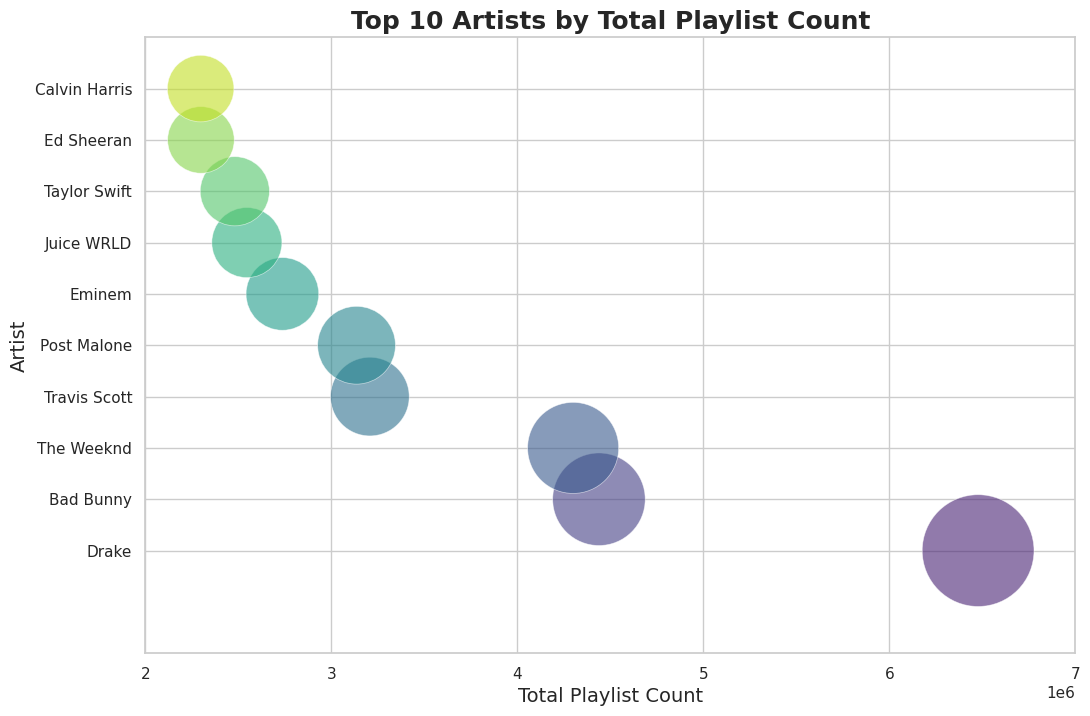

In [245]:
# Set the style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("viridis")

# Prepare data
top_artists_playlist_count = data.groupby(['Artist'])['Total Playlist Count'].sum().nlargest(10).reset_index()

# Create a bubble chart
plt.figure(figsize=(12, 8))
plt.scatter(x=top_artists_playlist_count['Total Playlist Count'], y=top_artists_playlist_count['Artist'], s=top_artists_playlist_count['Total Playlist Count']/1000, color=sns.color_palette("viridis", 10), alpha=0.6, edgecolors="w", linewidth=0.5)
plt.title('Top 10 Artists by Total Playlist Count', fontsize=18, fontweight='bold')
plt.xlabel('Total Playlist Count', fontsize=14)
plt.ylabel('Artist', fontsize=14)
plt.xlim(2e6,7e6)
plt.ylim(-2,10)
plt.show()


#### **Insights** :
Dominance of Drake: Drake has the highest total playlist count, indicating a strong presence in playlists.

Significant Counts for Popular Artists: Bad Bunny, The Weeknd, and Travis Scott also have high playlist counts, showcasing their popularity.

Varied Representation: The plot highlights a diverse range of artists with different levels of playlist counts.

This plot effectively visualizes the total playlist count for the top 10 artists, using bubble size and position to represent the data clearly.

### Trend of different streams over year till 2023

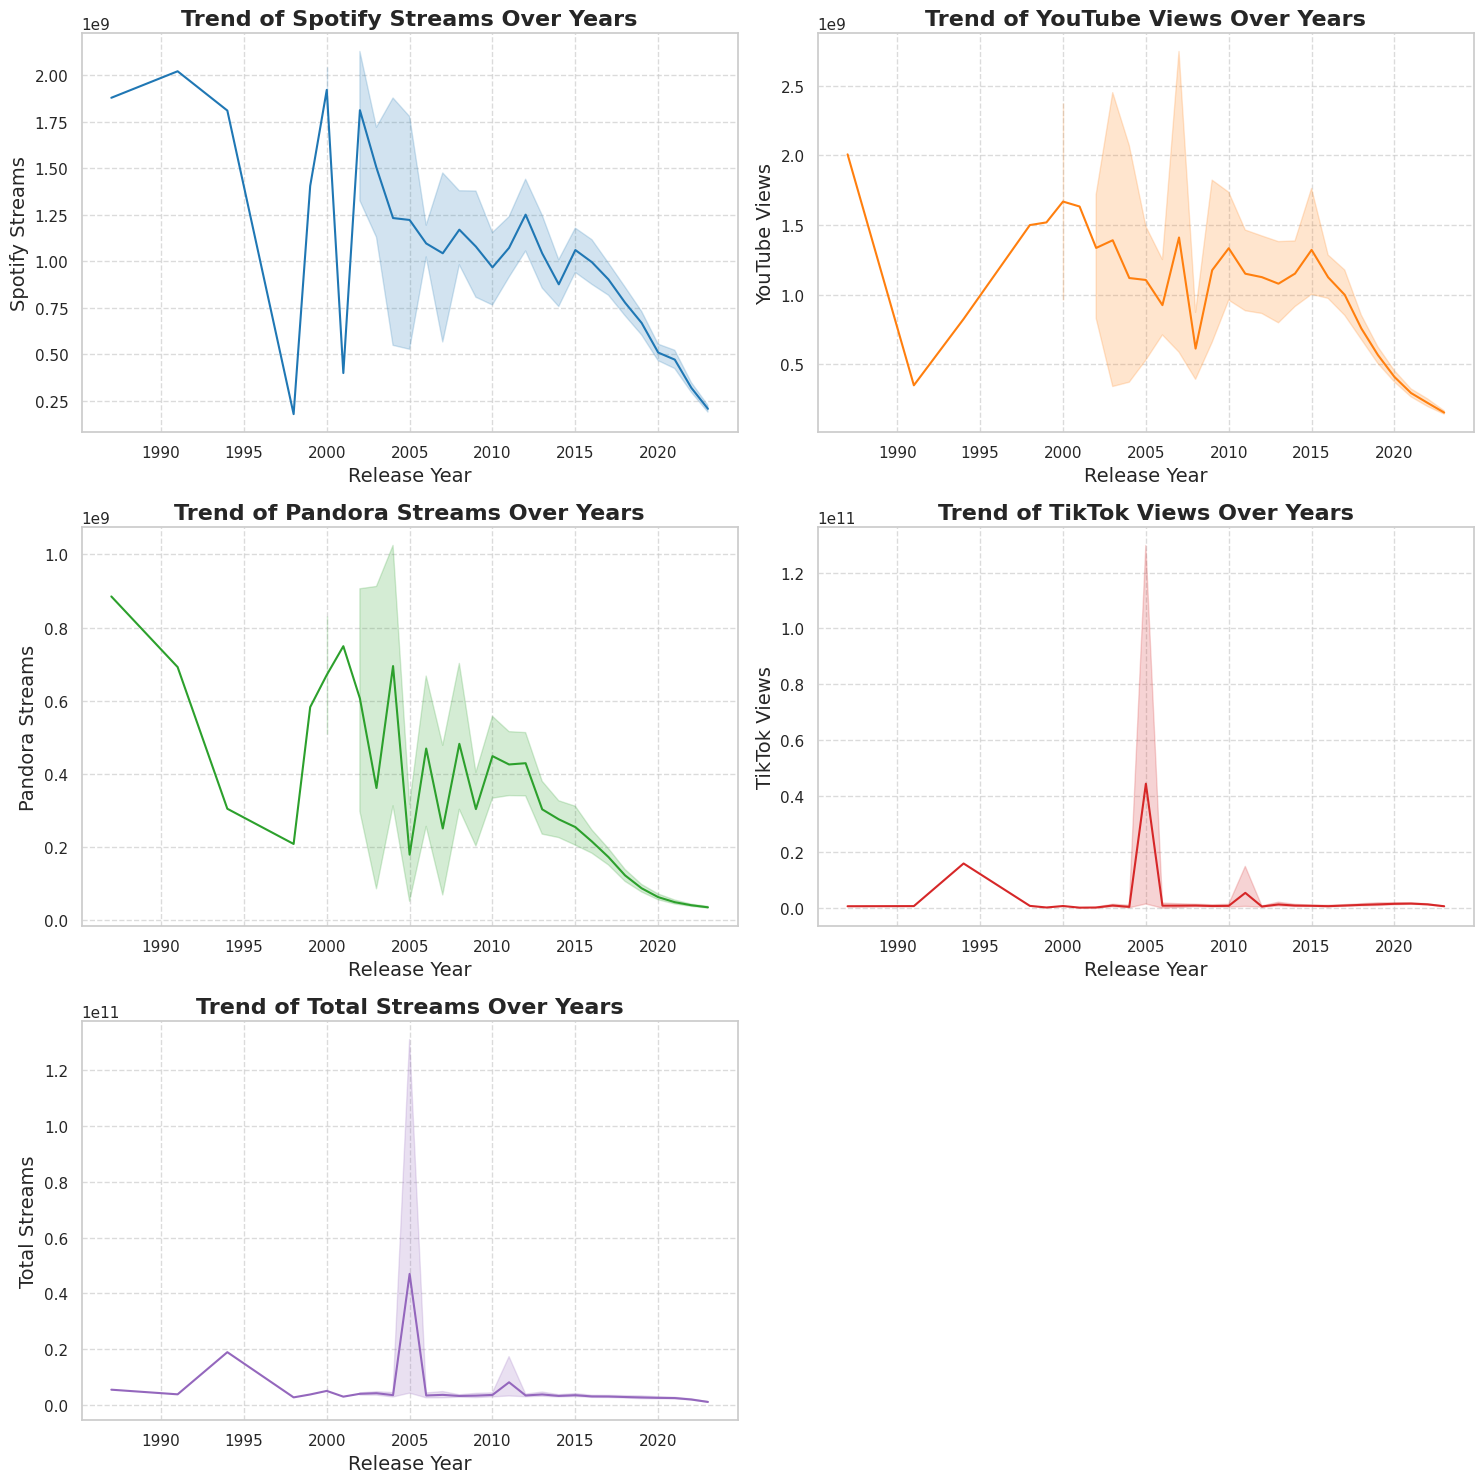

In [259]:
# Define the columns to plot
columns_to_plot = ['Spotify Streams', 'YouTube Views', 'Pandora Streams', 'TikTok Views', 'Total Streams']

# Filter data to include only up to 2023
data = data[data['Release Year'] <= 2023]

# Set up the figure and axis
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Set the color palette
palette = sns.color_palette("tab10", len(columns_to_plot))

# Plot each column
for i, column in enumerate(columns_to_plot):
    sns.lineplot(data=data, x='Release Year', y=column, ax=axes[i], color=palette[i])
    axes[i].set_title(f'Trend of {column} Over Years', fontsize=16, fontweight='bold')
    axes[i].set_xlabel('Release Year', fontsize=14)
    axes[i].set_ylabel(column, fontsize=14)
    axes[i].grid(True, linestyle='--', alpha=0.7)  # Add gridlines for readability

# Remove the unused subplot
fig.delaxes(axes[-1])

# Adjust the layout
plt.tight_layout()
plt.show()


#### **Insights** :
Spotify Streams Over Years: The trend shows significant fluctuations with an initial increase peaking around 1990, followed by a decline and stabilization around 2000. There is a noticeable drop post-2010.

YouTube Views Over Years: YouTube views display a rise and fall pattern, with a peak around 2005, followed by fluctuations and a decline post-2010.

Pandora Streams Over Years: Pandora streams have a decreasing trend overall, with some fluctuations and a slight increase around 2005, but a continuous decline post-2015.

TikTok Views Over Years: The TikTok views trend shows a major spike around 2005, followed by a sharp drop and maintaining low levels thereafter.

Total Streams Over Years: The combined trend for total streams also shows a significant spike around 2005, followed by a sharp decline and low levels in the subsequent years.

These trends indicate that while there were significant peaks in activity around certain periods, particularly 2005, many of the platforms experienced declines in the following years, suggesting shifts in user engagement and platform popularity over time.

### Yearly Growth Stream wise till 2023

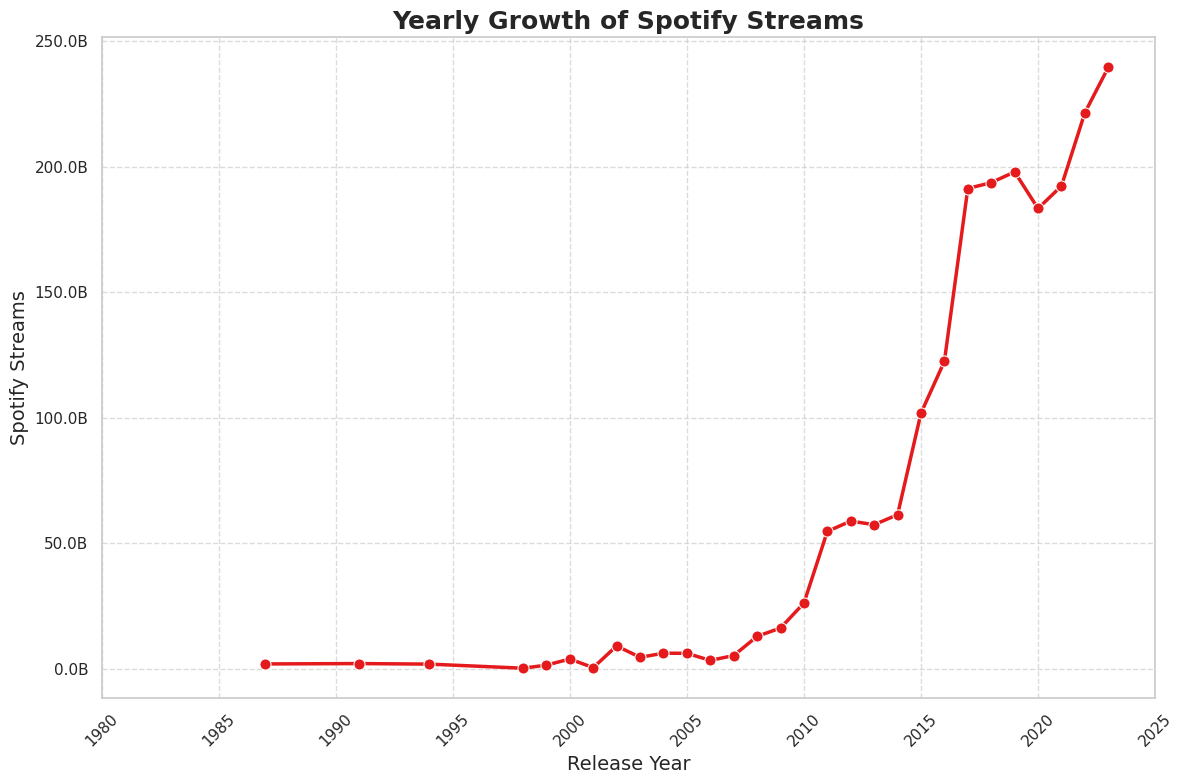

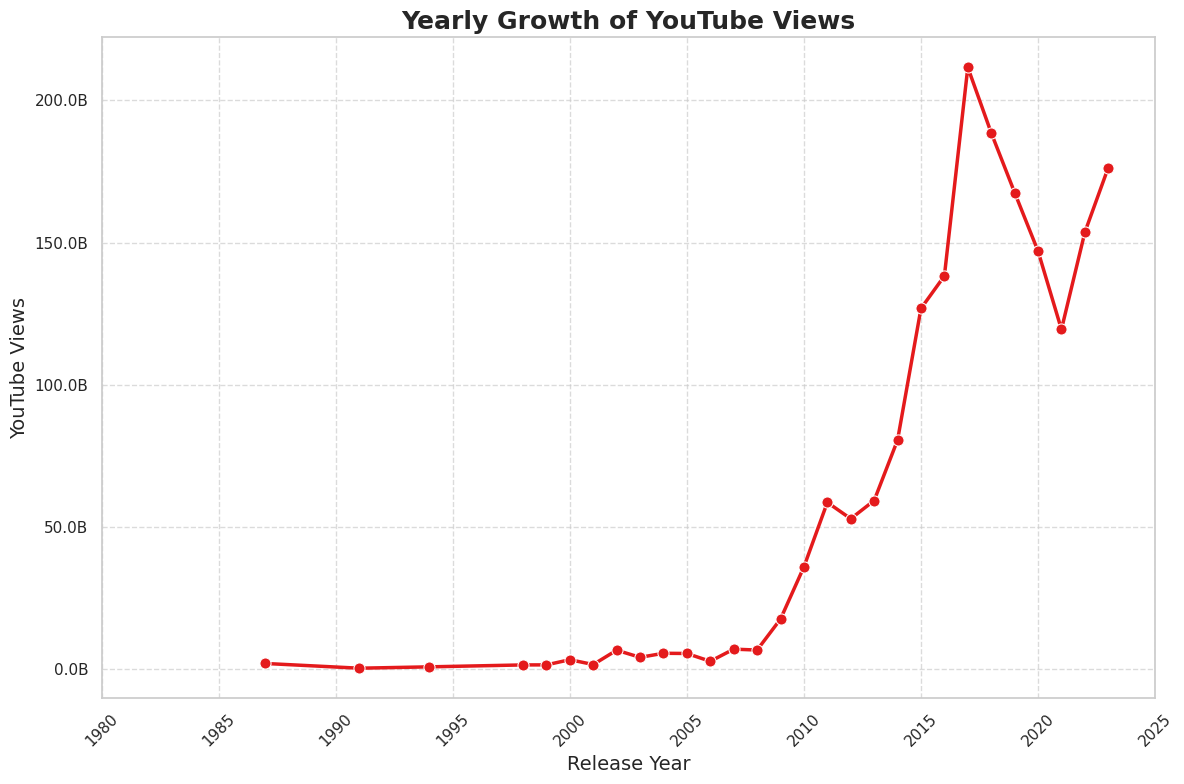

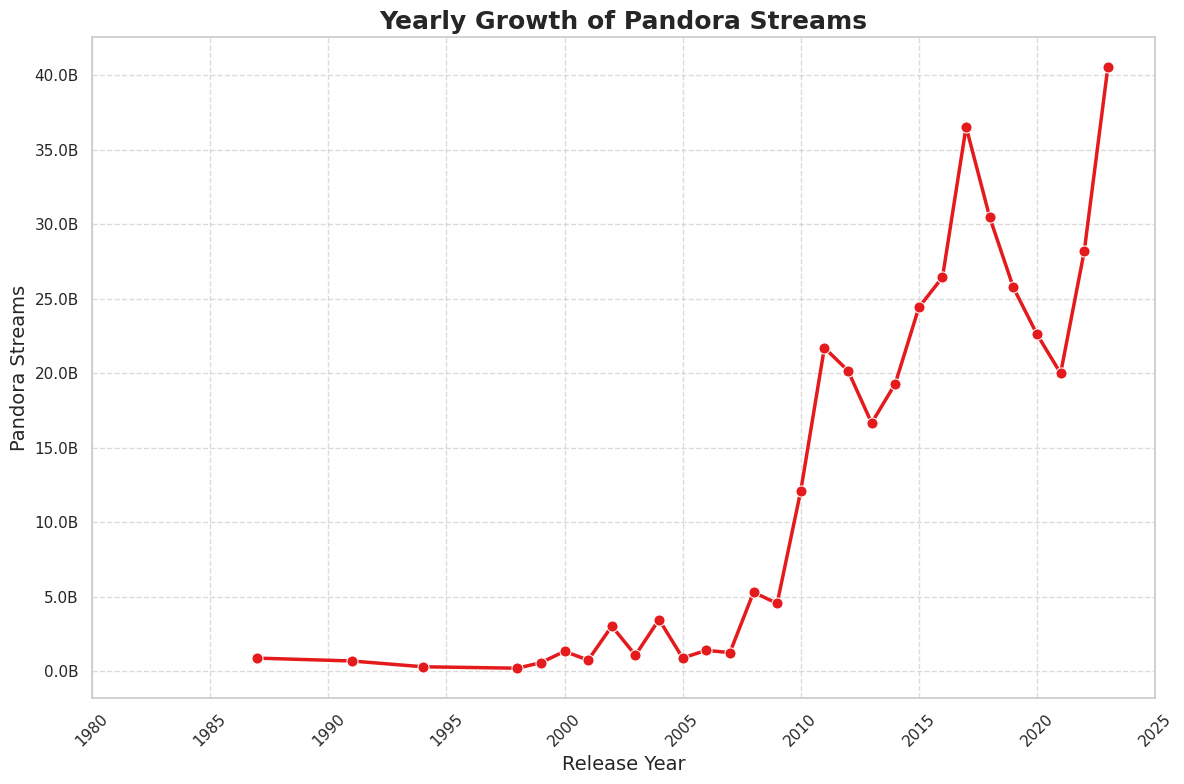

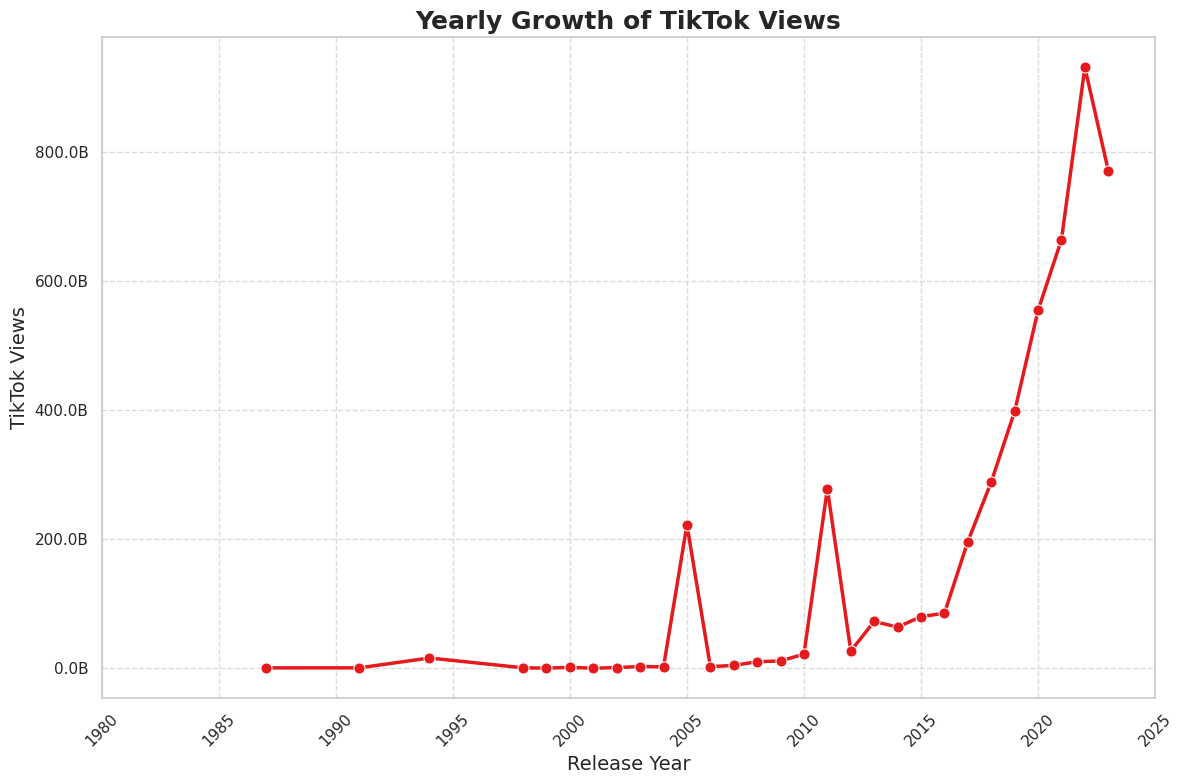

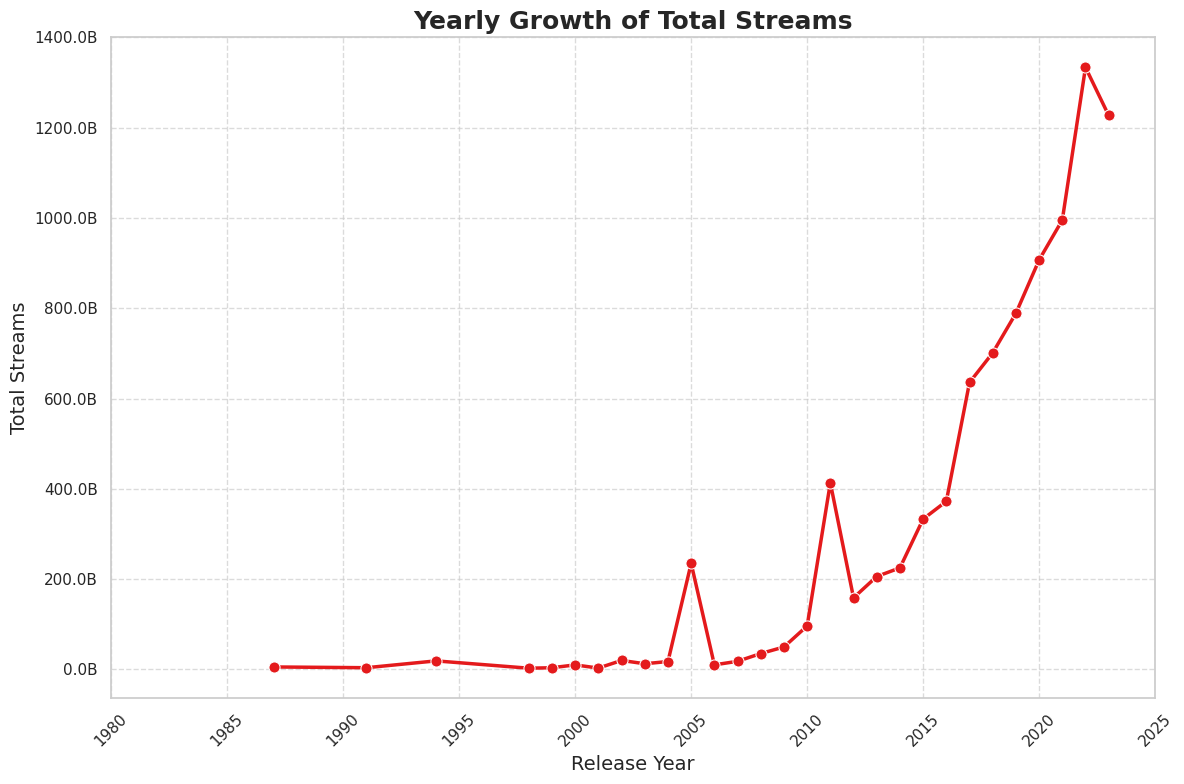

In [249]:
columns_to_plot = ['Spotify Streams', 'YouTube Views', 'Pandora Streams', 'TikTok Views', 'Total Streams']

# Define a color palette
palette = sns.color_palette("Set1")


# Function to plot the yearly growth of a given stream type
def plot_yearly_growth(column_name, title):
    streams_per_year = data[data['Release Year'] <= 2023].groupby('Release Year')[column_name].sum().reset_index()

    plt.figure(figsize=(12, 8))

    # Plot with customized style
    sns.lineplot(x='Release Year', y=column_name, data=streams_per_year, marker='o', color=palette[0], linewidth=2.5, markersize=8)

    # Add title and labels
    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel('Release Year', fontsize=14)
    plt.ylabel(column_name, fontsize=14)

    # Format the y-axis to display numbers in billions
    formatter = FuncFormatter(lambda x, pos: '%1.1fB' % (x * 1e-9))
    plt.gca().yaxis.set_major_formatter(formatter)

    # Add gridlines for readability
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.xlim(1980, 2025)

    # Improve x-ticks rotation and layout
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plotting the yearly growth for different stream types
for column in columns_to_plot:
    plot_yearly_growth(column, f'Yearly Growth of {column}')

#### **Insights** :
Spotify Streams: The number of Spotify streams has shown exponential growth since around 2015, with a steep increase in recent years.

YouTube Views: YouTube views have also grown significantly, with notable peaks around 2015 and 2020, followed by a slight decrease and then a rise again.

Pandora Streams: Pandora streams show a more gradual increase compared to Spotify and YouTube, with fluctuations but a general upward trend especially post-2010.

TikTok Views: TikTok views have exploded in recent years, particularly from around 2016 onwards, with a massive spike around 2022.

Total Streams: The total number of streams from all platforms shows a dramatic rise, reflecting the combined growth trends of individual platforms, with the most significant increases occurring post-2010.

These trends highlight the growing consumption of digital media over the years, with newer platforms like TikTok showing particularly rapid growth

### Yearly Growth Playlist Count Wise till 2023

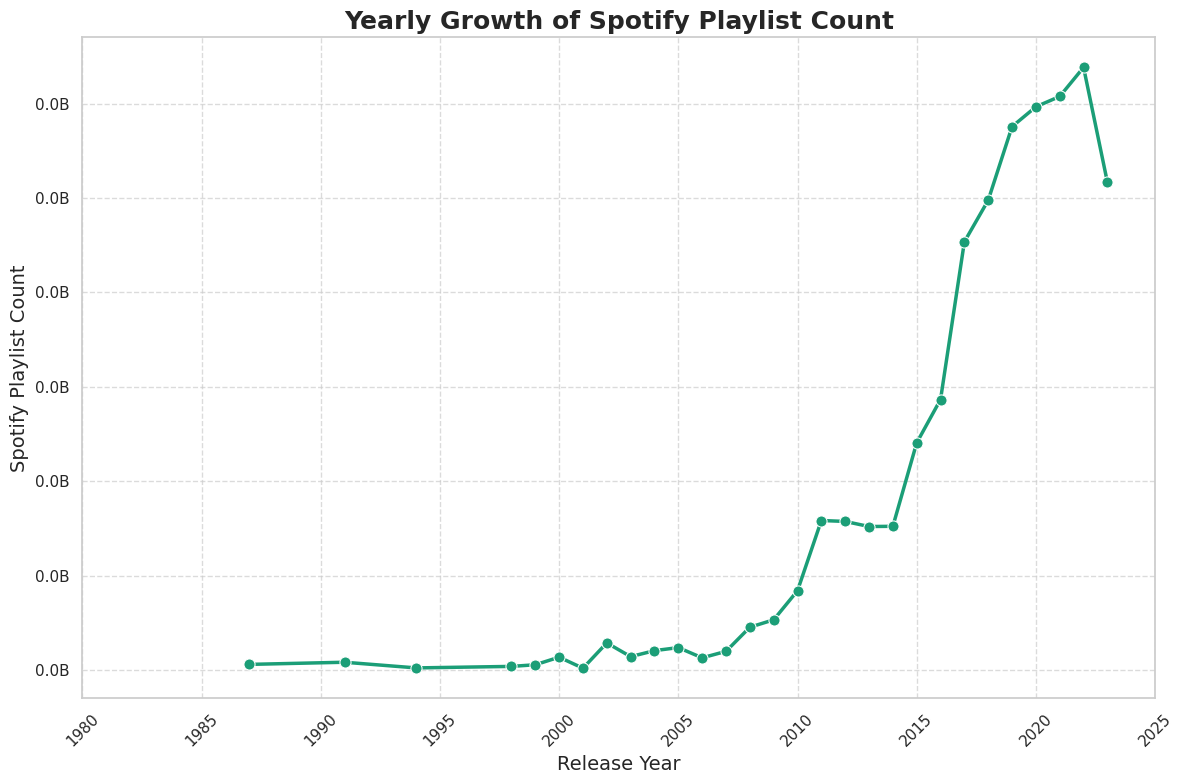

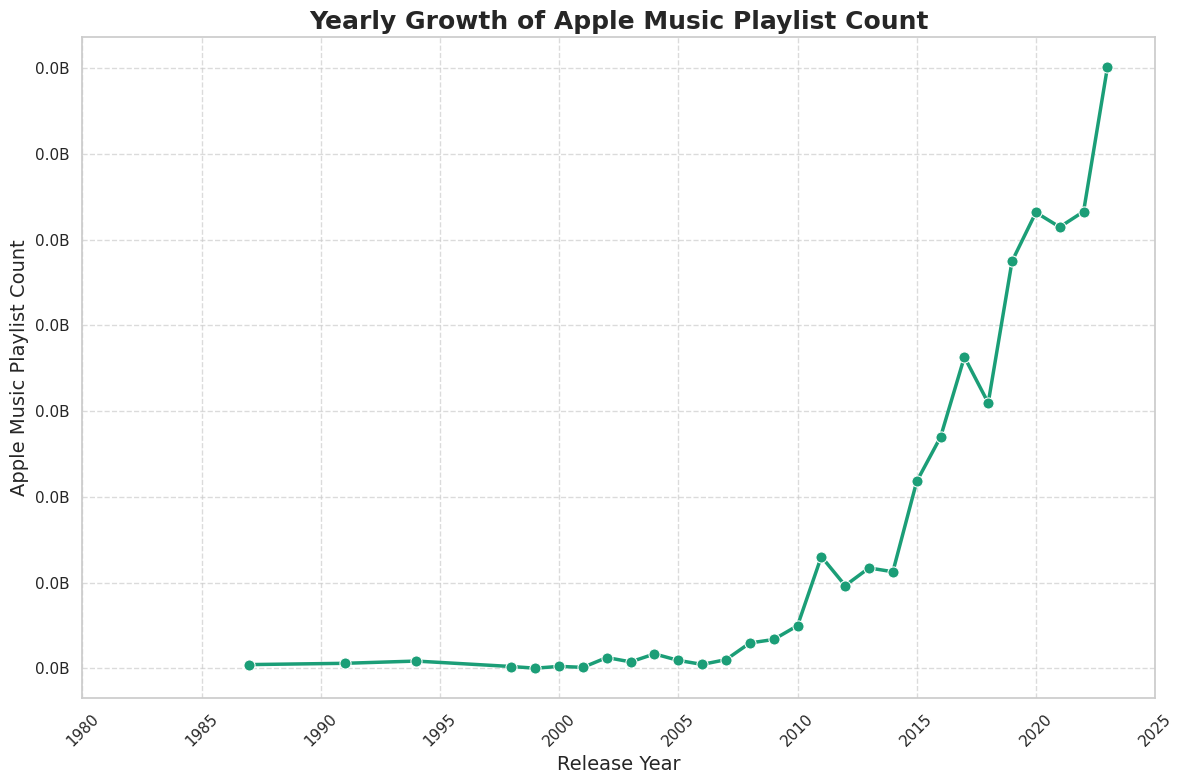

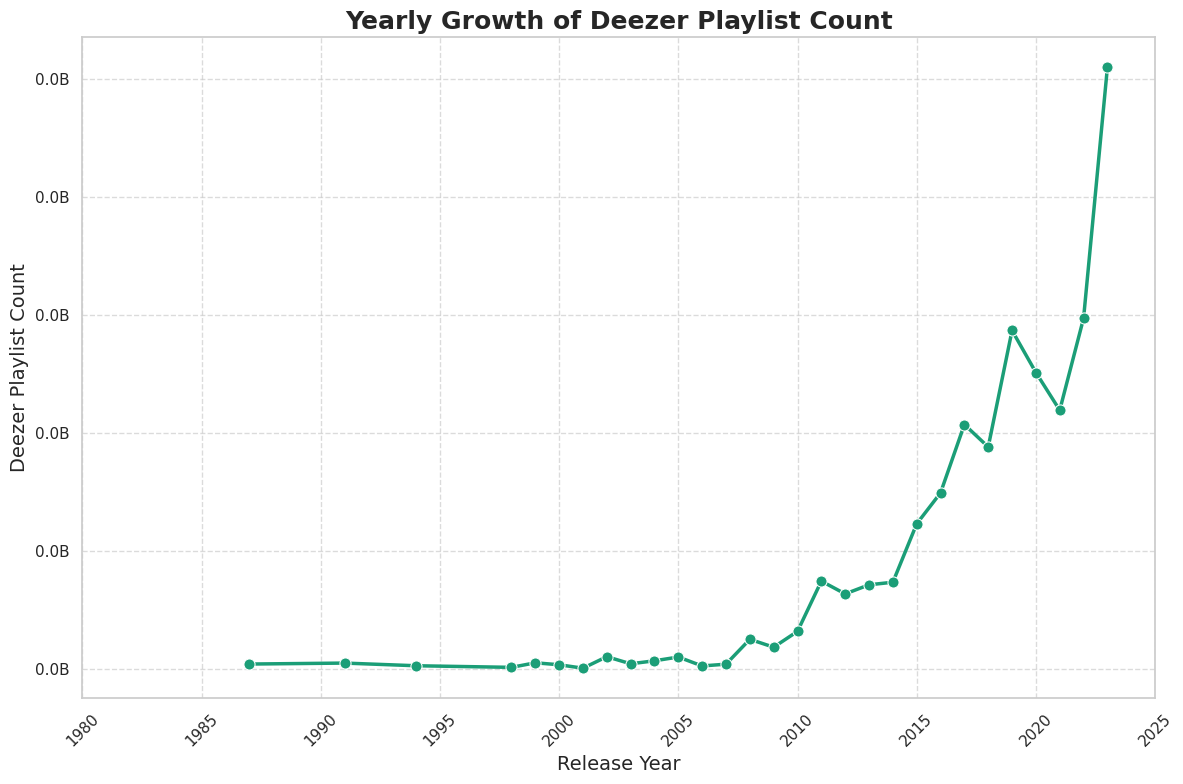

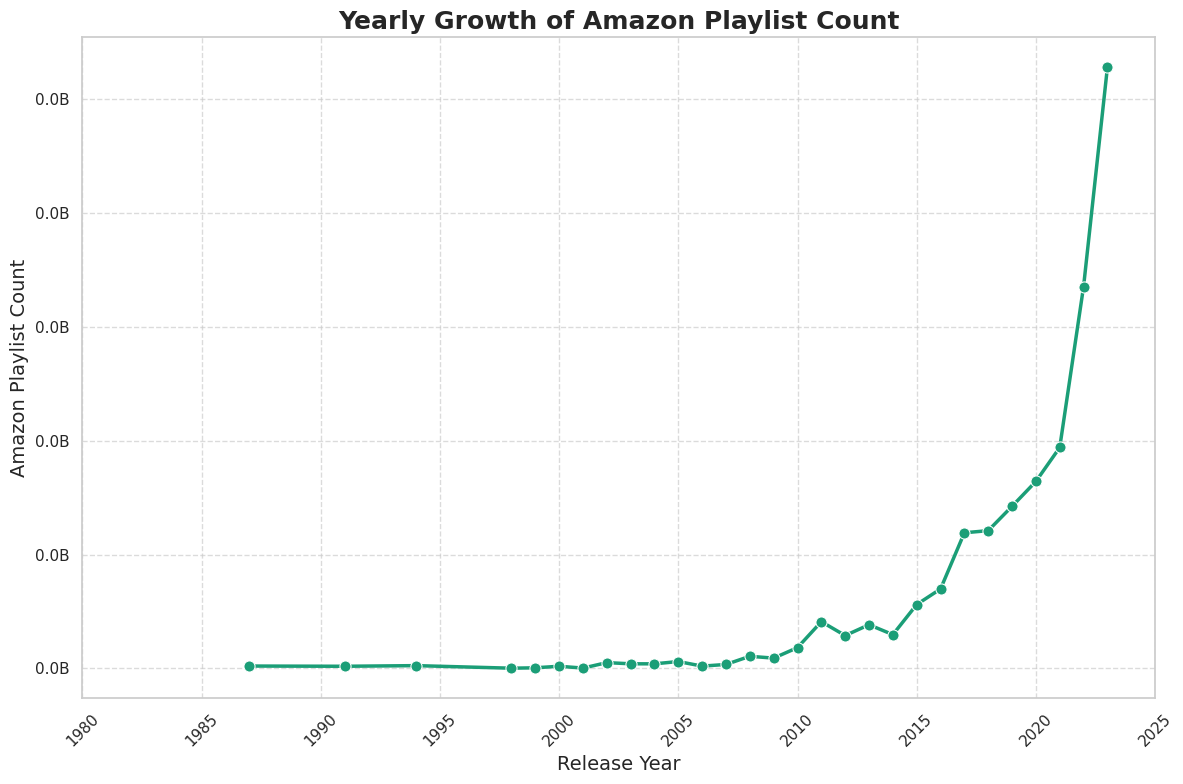

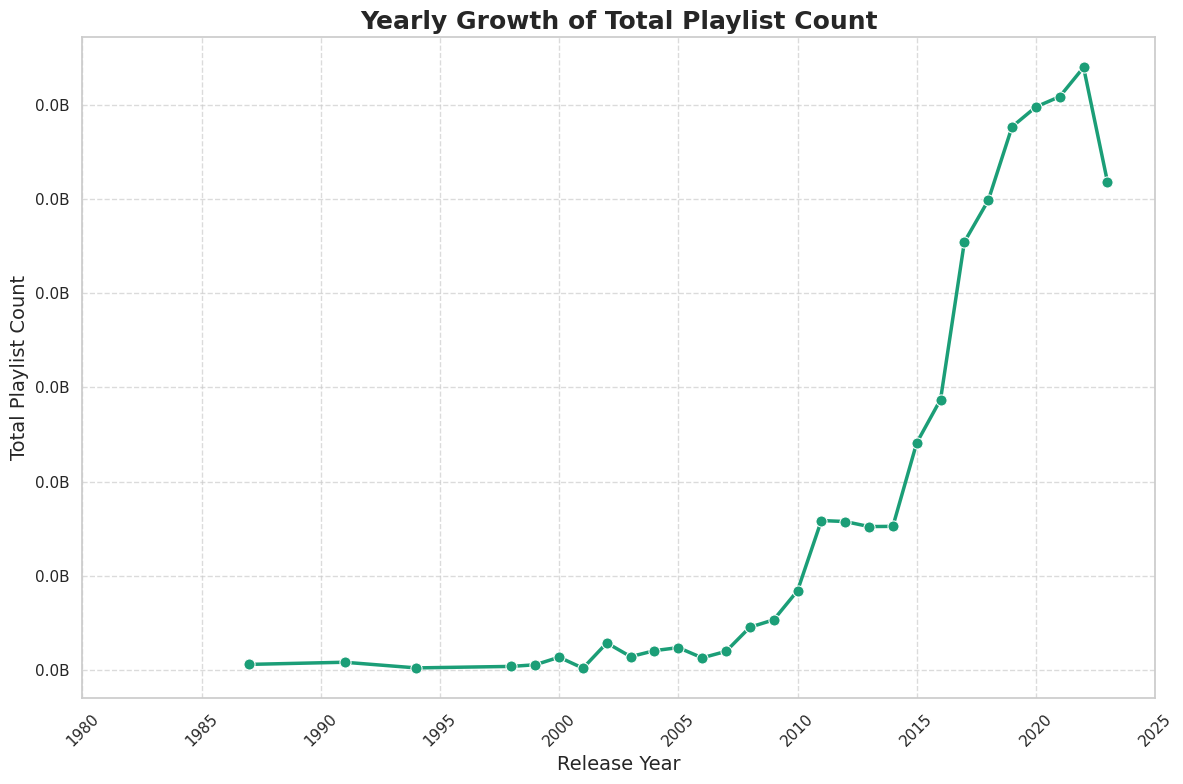

In [251]:
count_columns = ['Spotify Playlist Count', 'Apple Music Playlist Count', 'Deezer Playlist Count', 'Amazon Playlist Count', 'Total Playlist Count']

# Define a color palette similar to tab10
palette = sns.color_palette("Dark2", n_colors=4)

# Function to plot the yearly growth of a given count type
def plot_yearly_growth(column_name, title):
    counts_per_year = data[data['Release Year'] <= 2023].groupby('Release Year')[column_name].sum().reset_index()

    plt.figure(figsize=(12, 8))

    # Plot with customized style
    sns.lineplot(x='Release Year', y=column_name, data=counts_per_year, marker='o', color=palette[0], linewidth=2.5, markersize=8)

    # Add title and labels
    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel('Release Year', fontsize=14)
    plt.ylabel(column_name, fontsize=14)

    # Format the y-axis to display numbers in billions
    formatter = FuncFormatter(lambda x, pos: '%1.1fB' % (x * 1e-9))
    plt.gca().yaxis.set_major_formatter(formatter)

    # Add gridlines for readability
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.xlim(1980, 2025)

    # Improve x-ticks rotation and layout
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plotting the yearly growth for different count types
for column in count_columns:
    plot_yearly_growth(column, f'Yearly Growth of {column}')

#### **Insights** :
Spotify Playlist Count: The number of Spotify playlists has grown substantially since around 2014, peaking around 2021 before experiencing a slight decline.

Apple Music Playlist Count: Similar to Spotify, the number of Apple Music playlists has increased significantly, especially from 2014 onwards, with a notable surge in the last few years.

Deezer Playlist Count: Deezer playlists show a steady increase, with more pronounced growth starting around 2014 and continuing upwards.

Amazon Playlist Count: The growth in Amazon playlists is also marked by a rapid increase starting from around 2014, with a particularly steep rise in the most recent years.

Total Playlist Count: The total number of playlists across these platforms mirrors the individual trends, showing exponential growth post-2014, with a peak around 2022 and a slight decrease thereafter.

These plots indicate a significant rise in the creation and usage of playlists on major streaming platforms in the past decade, reflecting the growing trend of personalized music curation

### Yearly Growth Like Wise till 2023

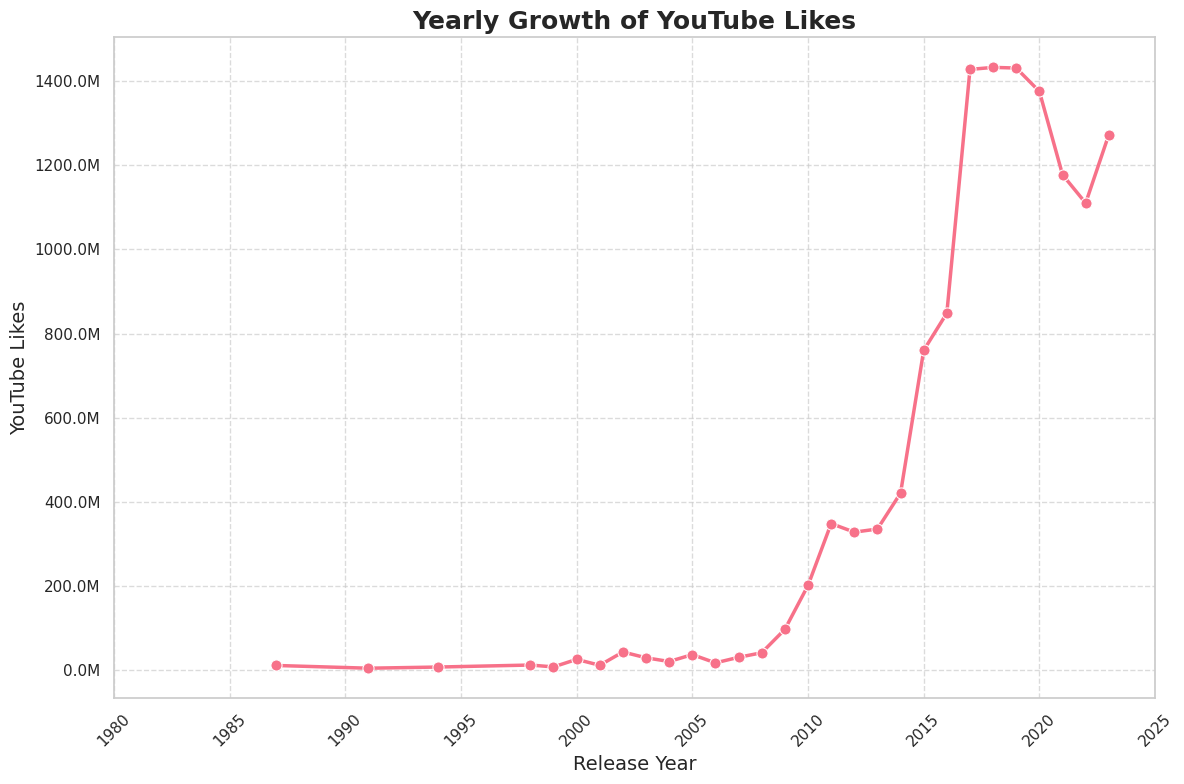

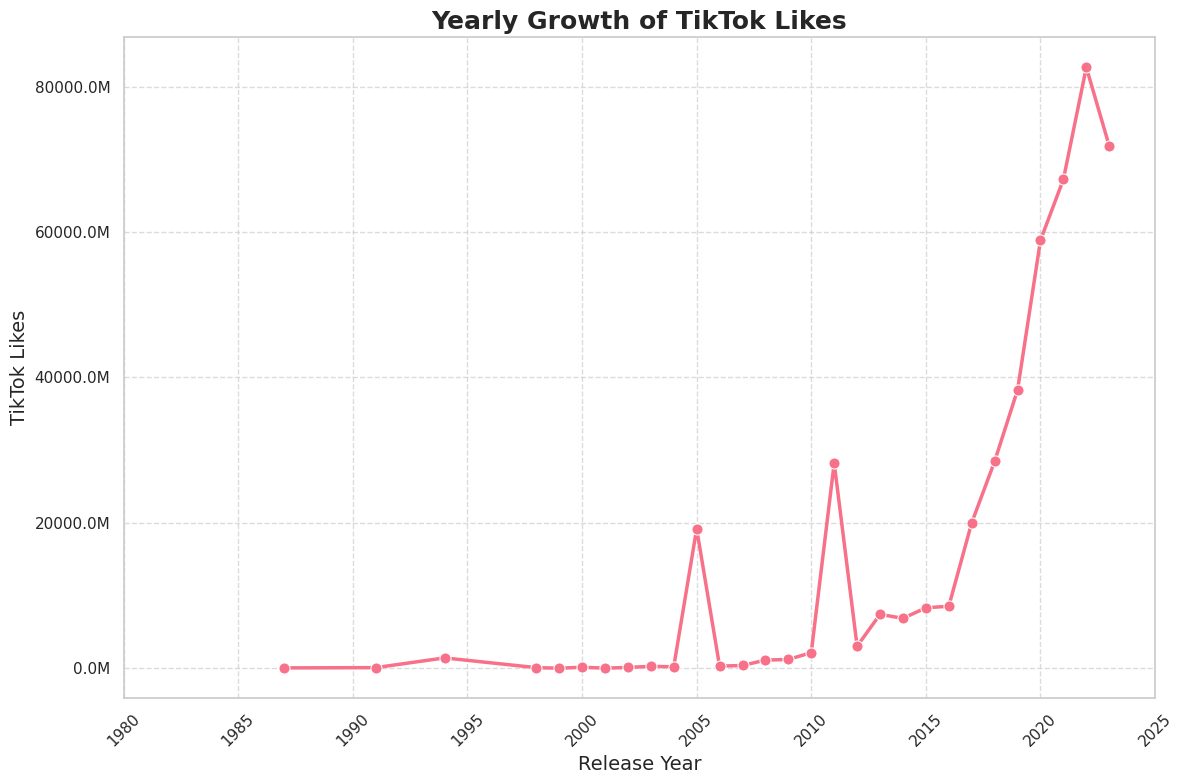

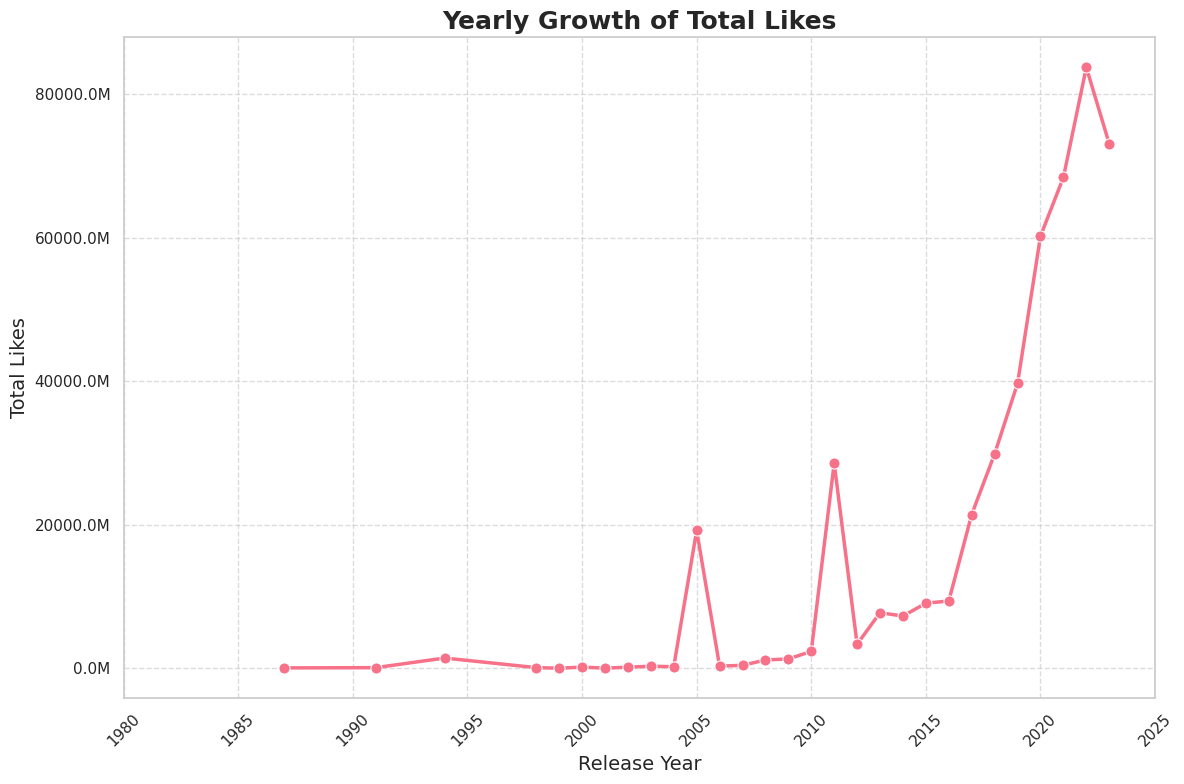

In [255]:
like_columns = ['YouTube Likes', 'TikTok Likes','Total Likes']

# Define a single color for all plots
plot_color = sns.color_palette("husl", n_colors=1)[0]

# Function to plot the yearly growth of a given metric
def plot_yearly_growth(column_name, title):
    counts_per_year = data[data['Release Year'] <= 2023].groupby('Release Year')[column_name].sum().reset_index()
    plt.figure(figsize=(12, 8))

    # Plot with the same color for all metrics
    sns.lineplot(x='Release Year', y=column_name, data=counts_per_year, marker='o', color=plot_color, linewidth=2.5, markersize=8)

    # Add title and labels
    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel('Release Year', fontsize=14)
    plt.ylabel(column_name, fontsize=14)

    # Format the y-axis to display numbers in millions
    formatter = FuncFormatter(lambda x, pos: '%1.1fM' % (x * 1e-6))
    plt.gca().yaxis.set_major_formatter(formatter)

    # Add gridlines for readability
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.xlim(1980, 2025)

    # Improve x-ticks rotation and layout
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plotting the yearly growth for different like types
for column in like_columns:
    plot_yearly_growth(column, f'Yearly Growth of {column}')




#### **Insights** :
YouTube Likes: The number of YouTube likes has shown a sharp increase since around 2013, peaking around 2016. After a slight decline, it shows a recent upward trend again.

TikTok Likes: TikTok likes have experienced a dramatic rise around 2005, 2011, particularly from around 2016 onwards, with a massive peak around 2020, followed by some fluctuations but maintaining a high level.

Total Likes: The total number of streams across platforms exhibits exponential growth, particularly post-2010, with significant peaks around 2020.

These plots emphasize the rapid growth and high engagement on platforms like YouTube and TikTok in recent years, reflecting increasing user interactions and content consumption on these digital platforms

### Yearly Growth Different Playlist Reach Wise till 2023

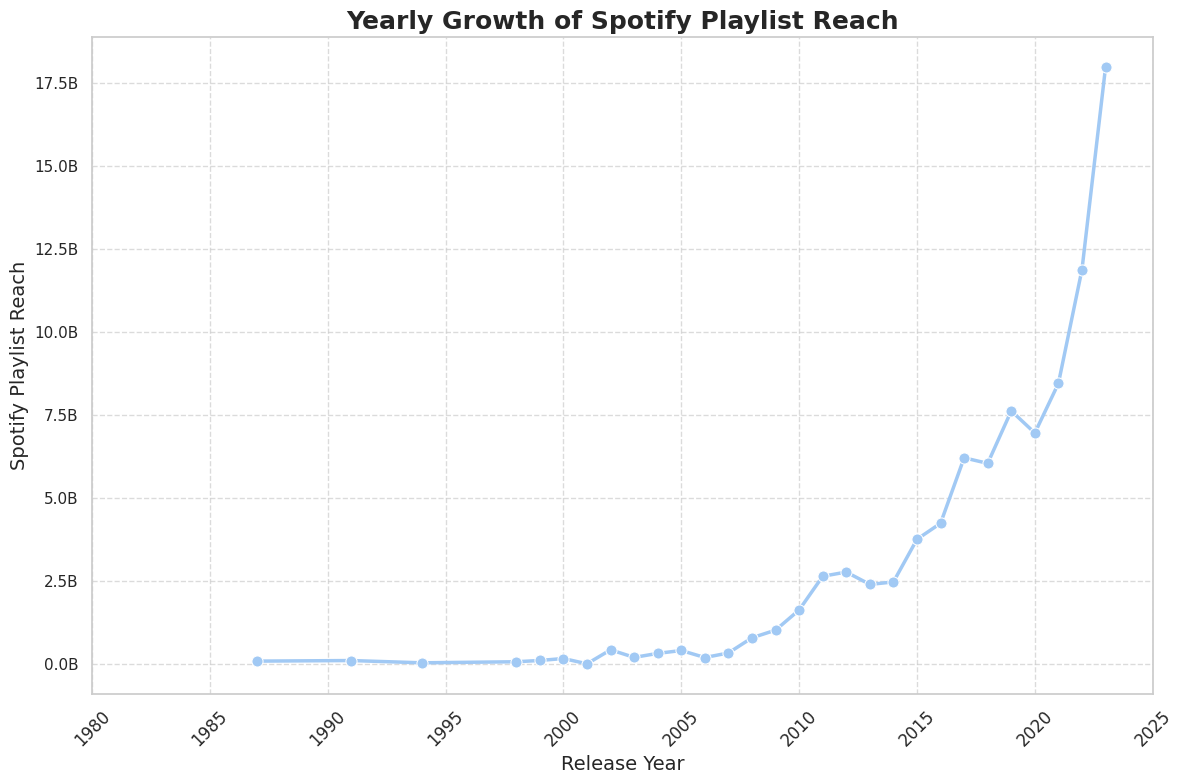

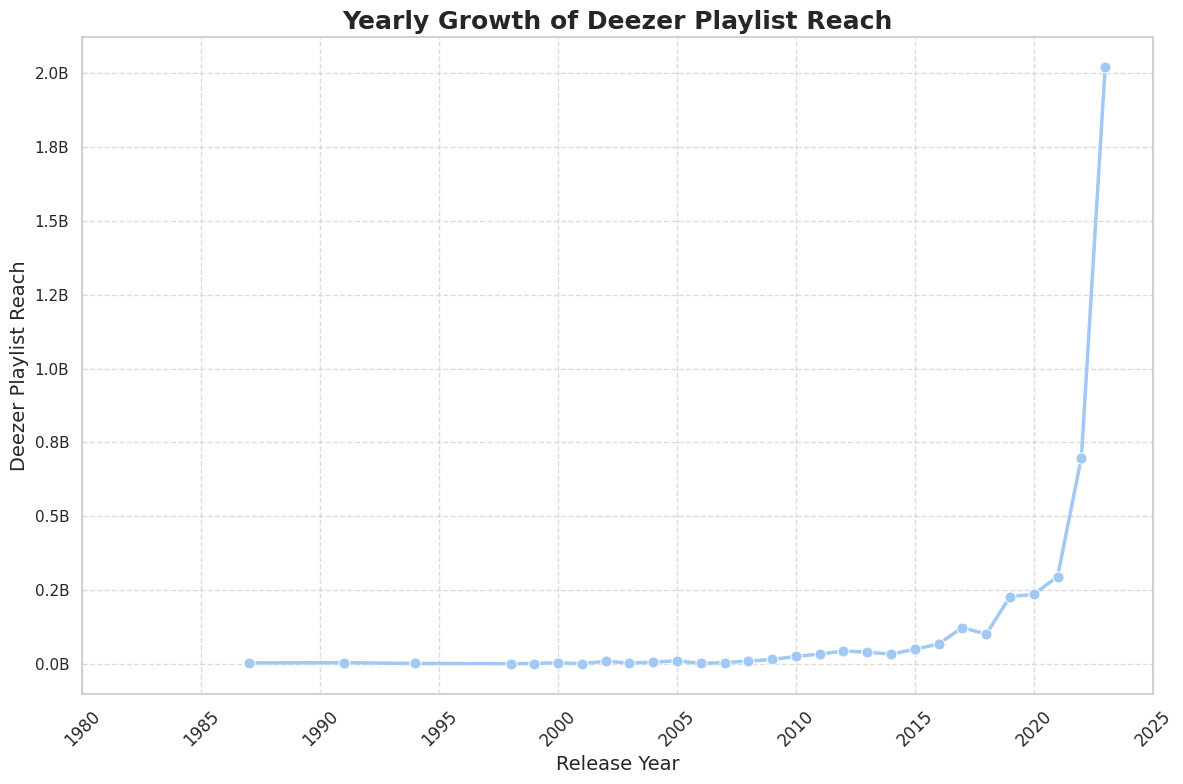

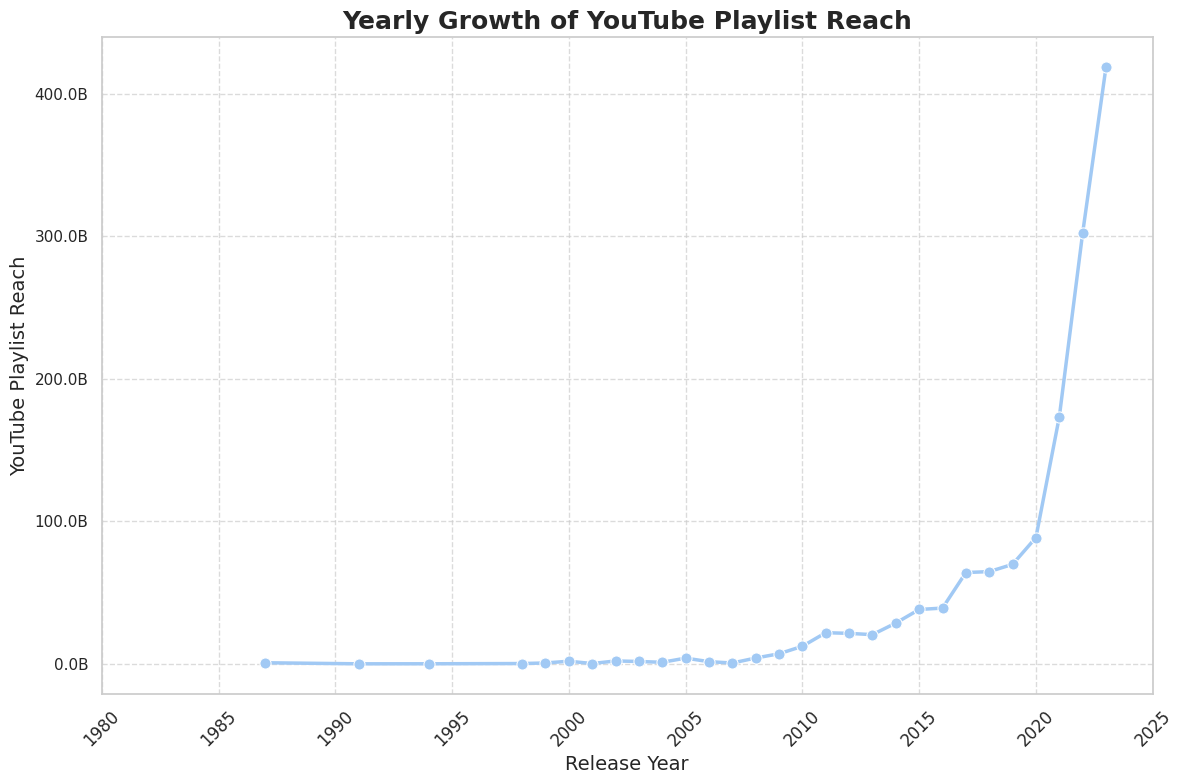

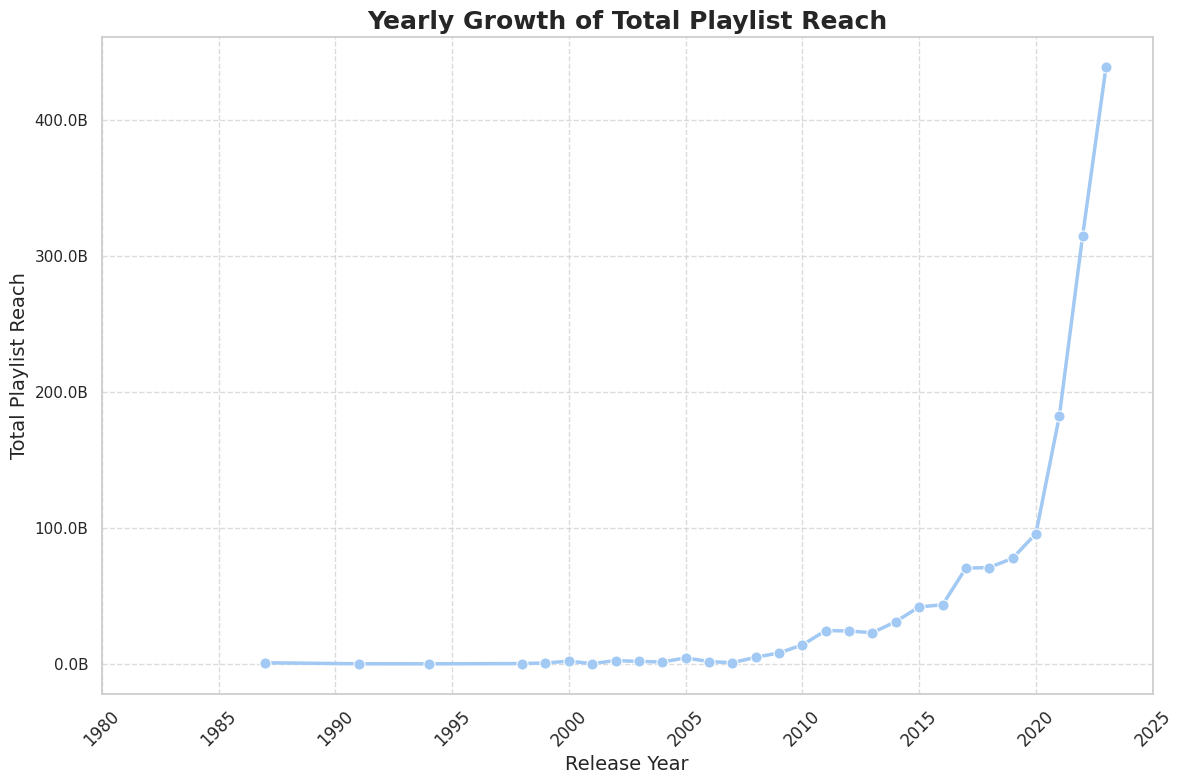

In [256]:
reach_columns = ['Spotify Playlist Reach', 'Deezer Playlist Reach', 'YouTube Playlist Reach','Total Playlist Reach']

# Define a single color for all plots
plot_color = sns.color_palette("pastel", n_colors=1)[0]

# Function to plot the yearly growth of a given reach type
def plot_yearly_growth(column_name, title):
    counts_per_year = data[data['Release Year'] <= 2023].groupby('Release Year')[column_name].sum().reset_index()

    plt.figure(figsize=(12, 8))

    # Plot with customized style
    sns.lineplot(x='Release Year', y=column_name, data=counts_per_year, marker='o', color=plot_color, linewidth=2.5, markersize=8)

    # Add title and labels with improved style
    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel('Release Year', fontsize=14)
    plt.ylabel(column_name, fontsize=14)

    # Format the y-axis to display numbers in billions
    formatter = FuncFormatter(lambda x, pos: '%1.1fB' % (x * 1e-9))
    plt.gca().yaxis.set_major_formatter(formatter)

    # Add gridlines for readability
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.xlim(1980, 2025)

    # Improve x-ticks rotation and layout
    plt.xticks(rotation=45, fontsize=12)
    plt.tight_layout()
    plt.show()

# Plotting the yearly growth for different reach types
for column in reach_columns:
    plot_yearly_growth(column, f'Yearly Growth of {column}')


### **Insights** :

Spotify Playlist Reach: The reach of Spotify playlists has shown exponential growth, especially from around 2015 onwards, reaching a sharp peak in recent years.

Deezer Playlist Reach: Deezer's playlist reach has increased significantly, with a very steep rise starting around 2021.

YouTube Playlist Reach: YouTube playlists have seen a considerable increase in reach, particularly noticeable from 2016, with a sharp rise peaking around 2020.

Total Playlist Reach: The combined reach of playlists across platforms mirrors the individual trends, showing a dramatic and exponential increase in recent years, especially from 2020 onwards.

These trends highlight the substantial increase in the audience reach of playlists across various platforms, reflecting the growing importance and popularity of curated music collections.

### Tracks by Stream Analysis

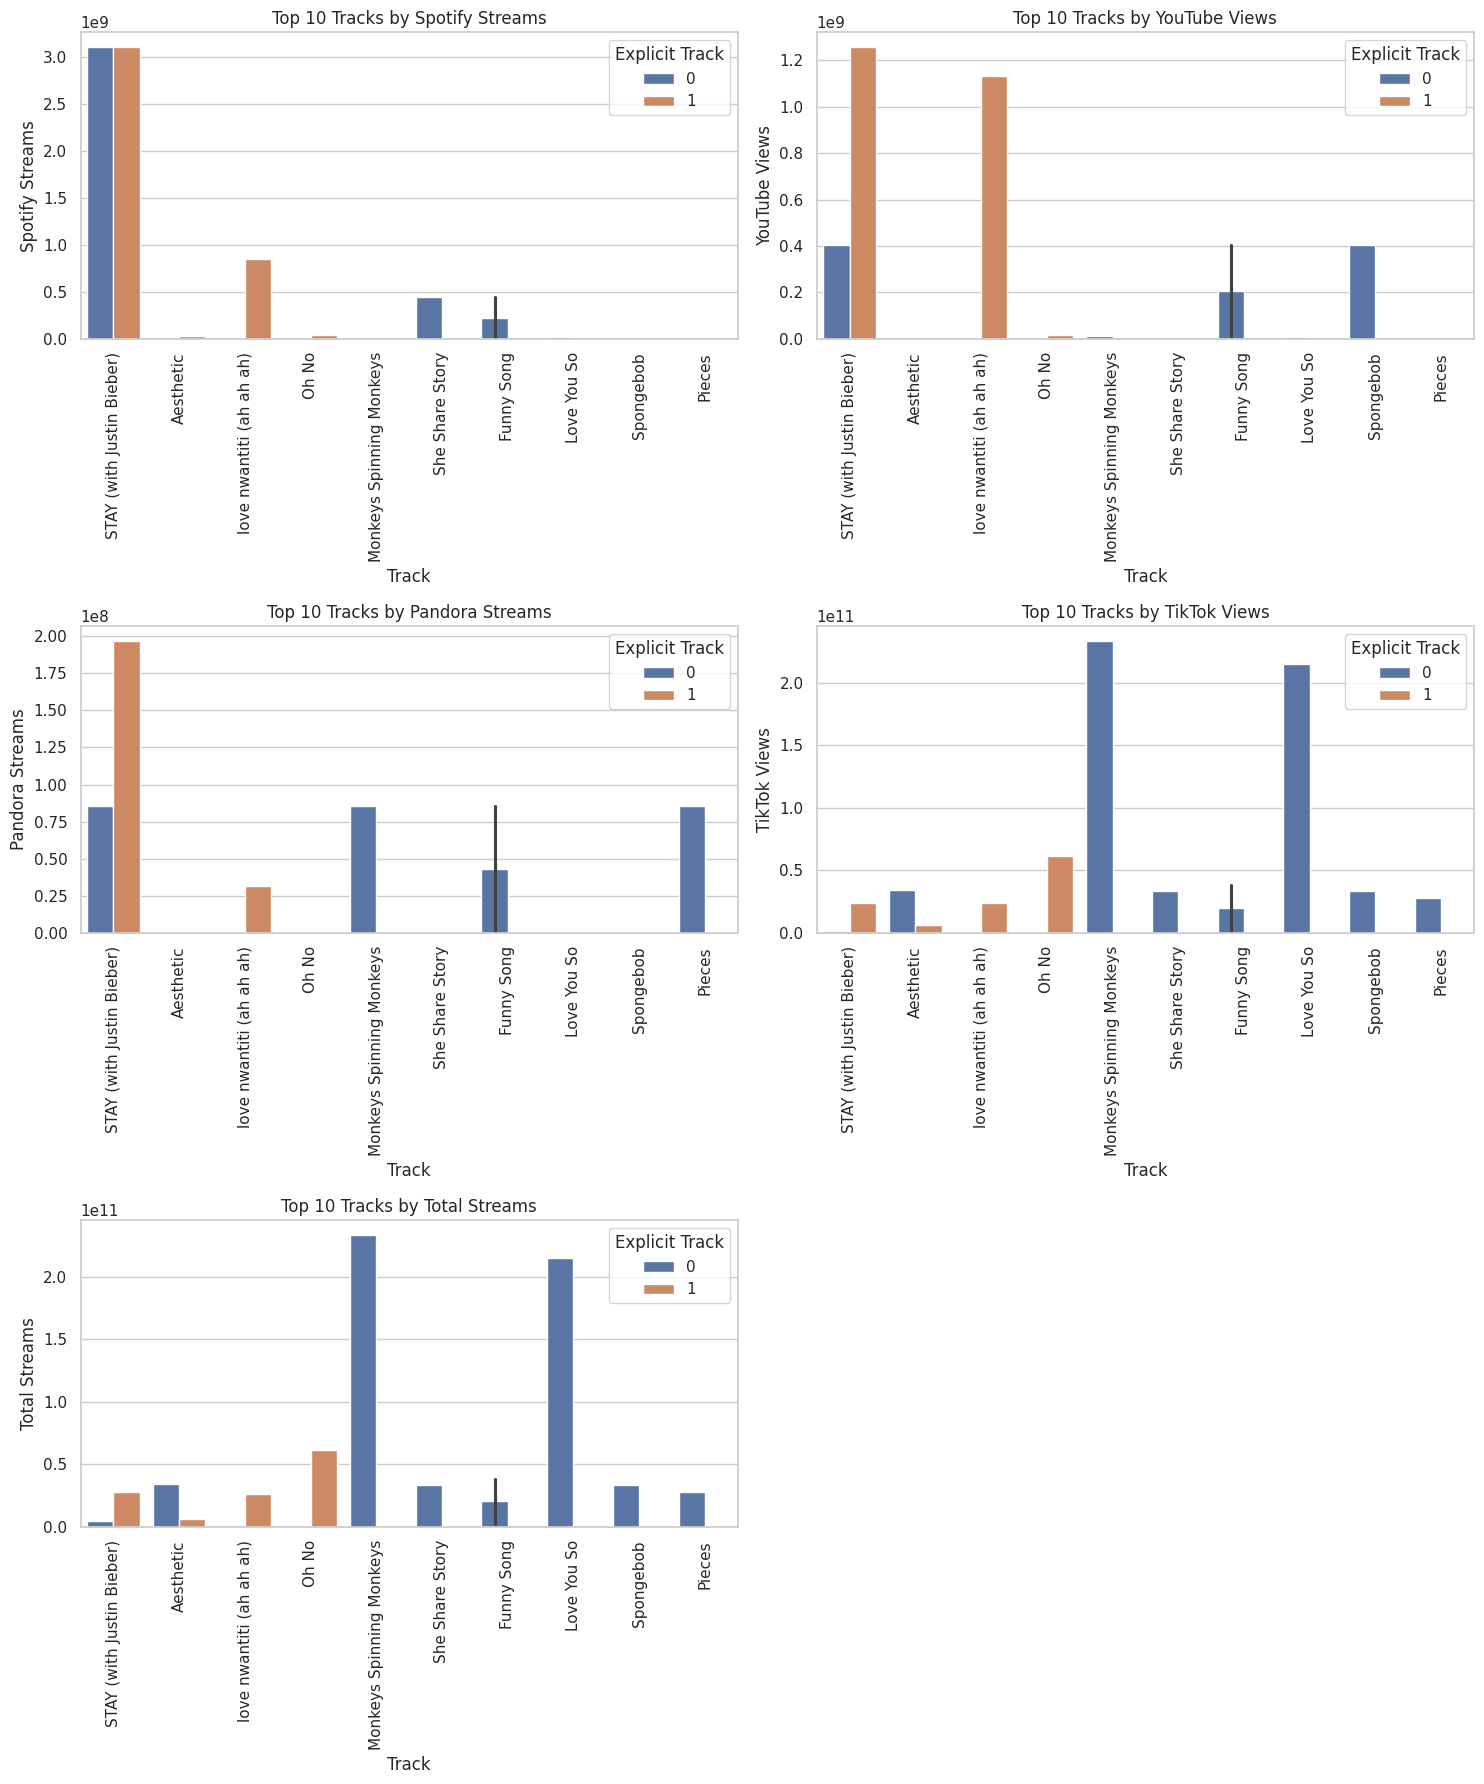

In [218]:
# Identify the top 10 tracks by Total Streams
top_10_tracks = data.nlargest(10, 'Total Streams')[['Track', 'Total Streams']]

# Merge to get the complete information of the top 10 tracks
top_10_data = data[data['Track'].isin(top_10_tracks['Track'])]

# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define the columns to plot
fields_to_plot = ['Spotify Streams', 'YouTube Views', 'Pandora Streams', 'TikTok Views', 'Total Streams', 'Spotify Popularity']

# Plot each field
for i, field in enumerate(fields_to_plot):
    sns.barplot(data=top_10_data, x='Track', y=field, hue='Explicit Track', ax=axes[i])
    axes[i].set_title(f'Top 10 Tracks by {field}')
    axes[i].set_xlabel('Track')
    axes[i].set_ylabel(field)
    axes[i].tick_params(axis='x', rotation=90)  # Rotate track names for better readability

# Remove the unused subplot
fig.delaxes(axes[-1])

# Adjust the layout
plt.tight_layout()
plt.show()


#### **Insights** :
Top 10 Tracks by Spotify Streams -

Dominant Track: "STAY (with Justin Bieber)" dominates Spotify streams with over 3 billion streams.

Explicit Content: A mix of explicit and non-explicit tracks, with explicit tracks like "Aesthetic" and "love nwantiti (ah ah ah)" having significant streams.

Top 10 Tracks by YouTube Views -

Top Performers: "STAY (with Justin Bieber)" and "Aesthetic" lead YouTube views with over 1 billion views each.

Explicit Content: Explicit tracks, marked in orange, have substantial views, similar to Spotify.

Top 10 Tracks by Pandora Streams -

Leading Track: "STAY (with Justin Bieber)" is also the most streamed track on Pandora, followed by "Pieces."

Explicit Content: Less representation of explicit tracks compared to Spotify and YouTube, with fewer explicit tracks in the top 10.

Top 10 Tracks by TikTok Views -

Viral Hits: "Monkeys Spinning Monkeys" and "Love You So" have the highest TikTok views, each over 2 billion.

Explicit Content: A mix of explicit and non-explicit tracks, with explicit tracks having notable views.

Top 10 Tracks by Total Streams -

Overall Leaders: "Monkeys Spinning Monkeys" and "Love You So" dominate total streams across platforms.

Explicit Content: Explicit tracks like "Oh No" and "Aesthetic" have significant total streams, indicating their wide popularity.

### Tracks by Likes Analysis

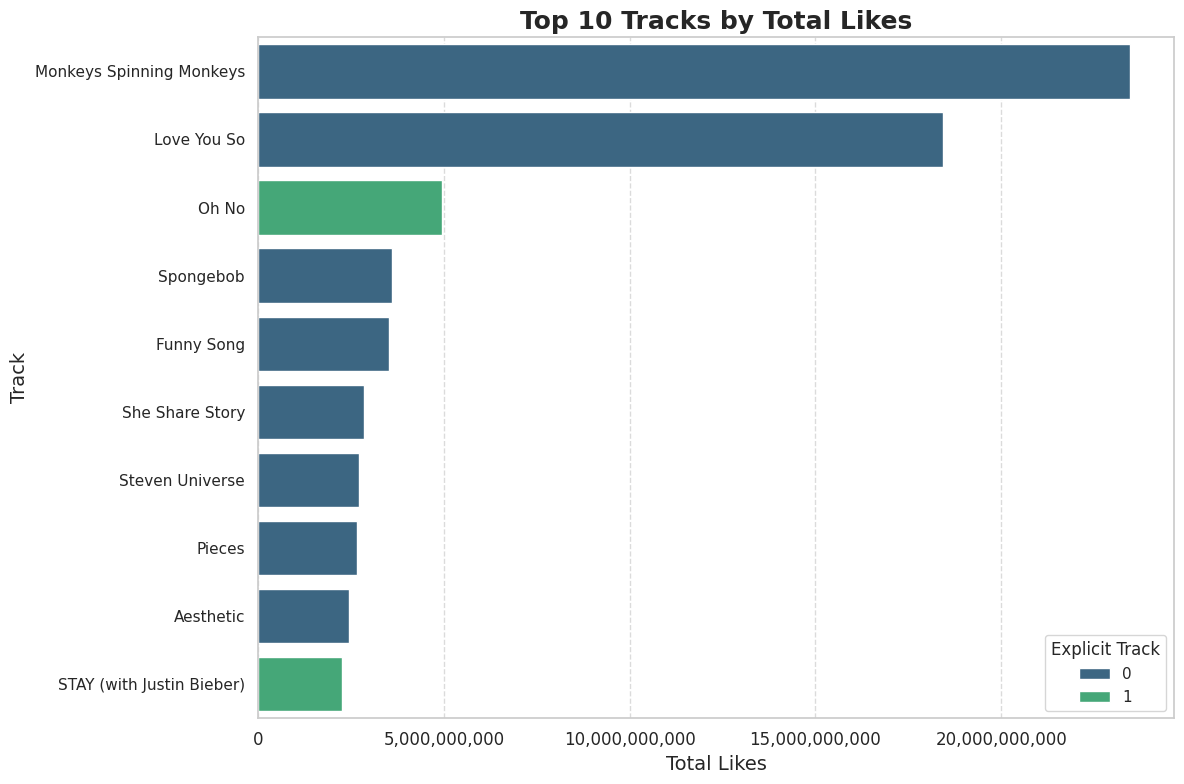

In [220]:
# Group by track and sum the total likes for each track
top_tracks_likes = data.groupby(['Track', 'Explicit Track'])['Total Likes'].sum().nlargest(10).reset_index()

# Define the color palette
palette = sns.color_palette("viridis", n_colors=len(top_tracks_likes['Explicit Track'].unique()))

# Create a bar plot for the top 10 tracks by total likes
plt.figure(figsize=(12, 8))

# Plot with customized appearance
sns.barplot(data=top_tracks_likes, x='Total Likes', y='Track', hue='Explicit Track', palette=palette)

# Add title and labels with improved style
plt.title('Top 10 Tracks by Total Likes', fontsize=18, fontweight='bold')
plt.xlabel('Total Likes', fontsize=14)
plt.ylabel('Track', fontsize=14)

# Format x-axis to display numbers with thousands separators
formatter = FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)

# Add gridlines for readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Rotate x-tick labels if necessary
plt.xticks(rotation=0, fontsize=12)

# Improve layout
plt.tight_layout()
plt.show()


#### **Insights** :
Leading Tracks: "Monkeys Spinning Monkeys" and "Love You So" have the highest total likes, each exceeding 20 billion likes.

Explicit Content: "Oh No" and "STAY (with Justin Bieber)" are the only explicit tracks in the top 10, with "Oh No" having significant likes.

Diverse Content: The list includes a variety of content, from viral tracks like "Monkeys Spinning Monkeys" to popular tracks like "STAY (with Justin Bieber)."

### Album by Streams Analysis

<ipython-input-221-14ffaf6e2a4b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Album Name', y=metric, data=top_4, palette='deep')


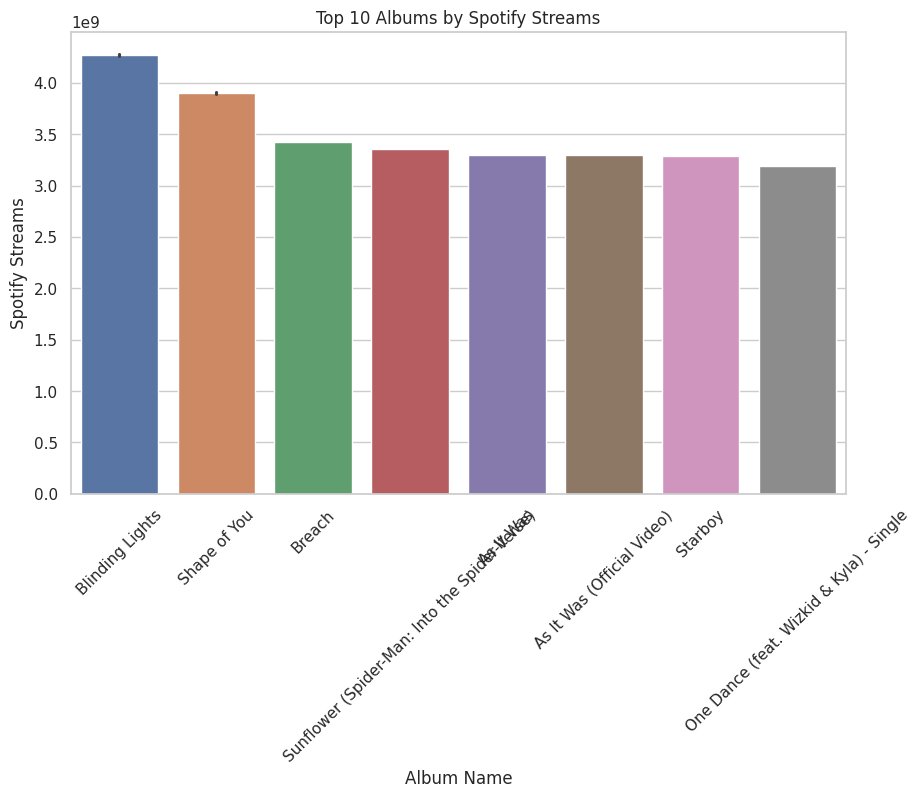

<ipython-input-221-14ffaf6e2a4b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Album Name', y=metric, data=top_4, palette='deep')


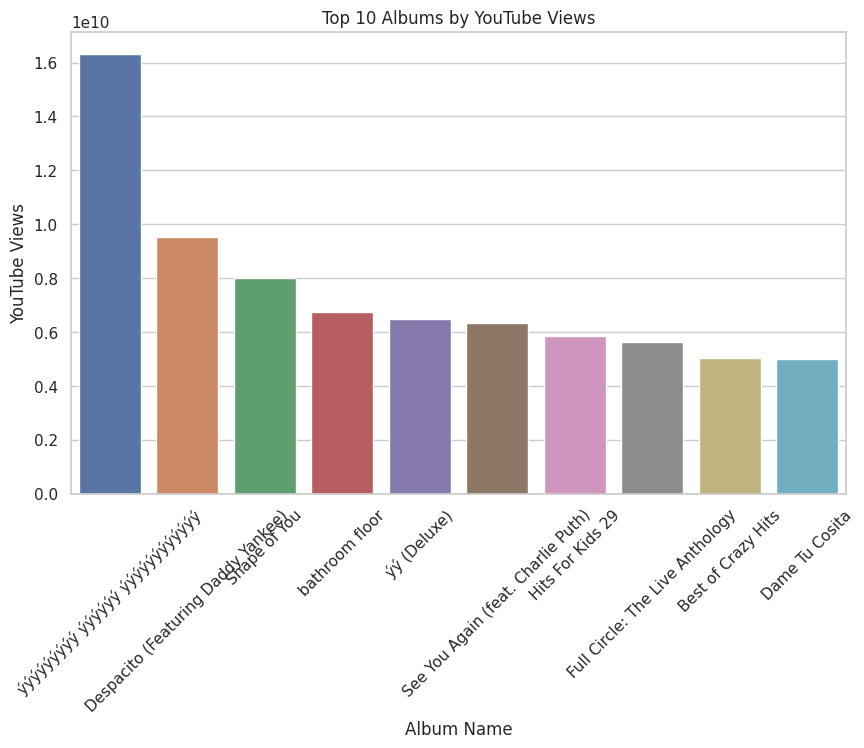

<ipython-input-221-14ffaf6e2a4b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Album Name', y=metric, data=top_4, palette='deep')


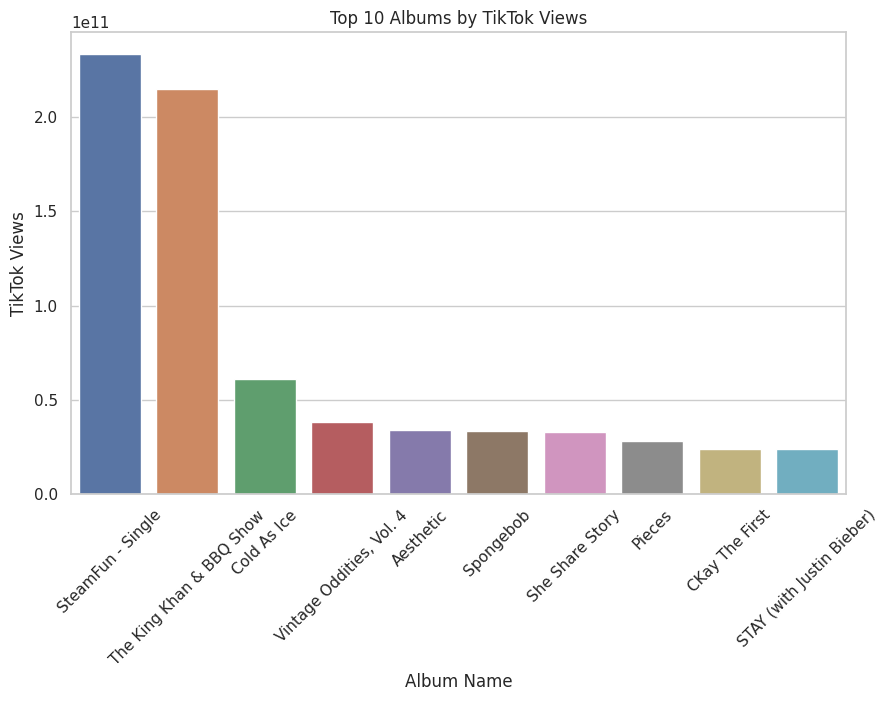

<ipython-input-221-14ffaf6e2a4b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Album Name', y=metric, data=top_4, palette='deep')


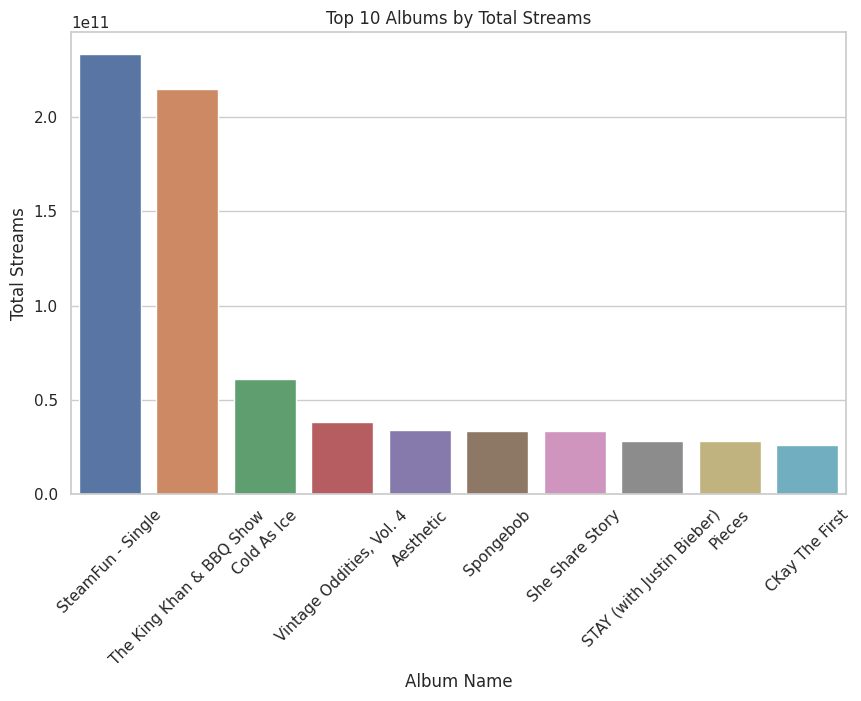

In [221]:
# Seaborn plot function for top 4 albums
def seaborn_plot_top_4(metric):
    top_4 = data.nlargest(10, metric)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Album Name', y=metric, data=top_4, palette='deep')
    plt.xlabel('Album Name')
    plt.ylabel(metric)
    plt.title(f'Top 10 Albums by {metric}')
    plt.xticks(rotation=45)
    plt.show()

# Using Seaborn for enhanced visualization
seaborn_plot_top_4('Spotify Streams')
seaborn_plot_top_4('YouTube Views')
seaborn_plot_top_4('TikTok Views')
seaborn_plot_top_4('Total Streams')


#### **Insights** :
Top 10 Albums by Spotify Streams -

Leading Album: "Blinding Lights" has the highest number of Spotify streams, over 4 billion.

Popular Tracks: Albums like "Shape of You" and "Breach" also have significant streams, each exceeding 3 billion.

Top 10 Albums by YouTube Views -

Top Performer: "Despacito (Featuring Daddy Yankee)" dominates YouTube views with over 1.6 billion views.

Variety in Content: Albums such as "Shape of You" and "bathroom floor" also rank high, each with substantial views.

Top 10 Albums by TikTok Views -

Viral Albums: "SteamRun - Single" and "The King Khan & BBQ Show" lead TikTok views, each exceeding 2 billion views.

Diverse Content: Other albums like "Cold As Ice" and "Vintage Oddities, Vol. 4" also have notable views.

Top 10 Albums by Total Streams -

Overall Leaders: "SteamRun - Single" and "The King Khan & BBQ Show" dominate total streams across platforms.

Wide Range: Albums like "Cold As Ice" and "Vintage Oddities, Vol. 4" rank high, showing a broad appeal across different platforms.

### Album by Spotify Popularity Analysis

<ipython-input-222-f70e60c2ee03>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Spotify Popularity', y='Album Name', data=top_10_albums, palette='deep')


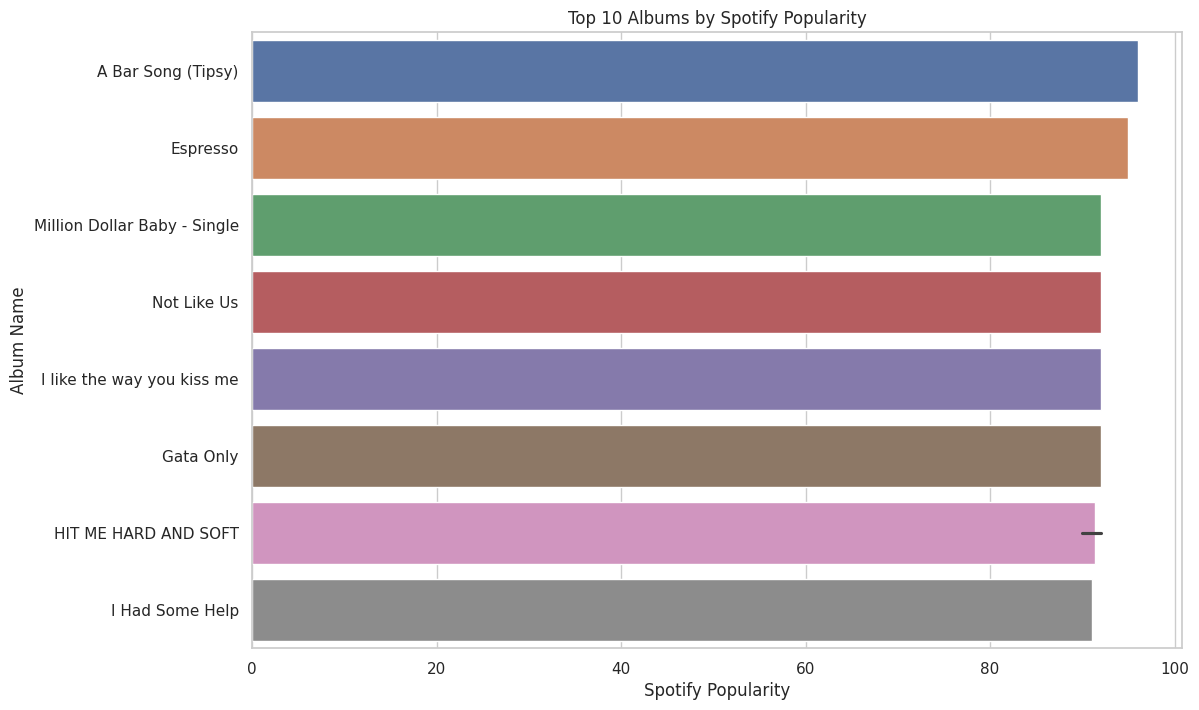

In [222]:
# Sort the data by 'Spotify Popularity' in descending order and get the top 10 albums
top_10_albums = data.nlargest(10, 'Spotify Popularity')

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Spotify Popularity', y='Album Name', data=top_10_albums, palette='deep')

# Add titles and labels
plt.title('Top 10 Albums by Spotify Popularity')
plt.xlabel('Spotify Popularity')
plt.ylabel('Album Name')

# Show the plot
plt.show()


#### **Insights** :
High Popularity Ratings: The top 10 albums are all highly popular on Spotify, with minimal variation in their popularity scores, indicating consistent audience engagement.

Diverse Content: The variety in album names suggests a broad range of genres and styles appealing to different listener preferences.

No Single Dominant Album: Unlike other metrics where a single album may dominate, popularity ratings are evenly distributed among the top albums.

### Most Streamed Song Analysis

<ipython-input-223-1494ffbbe144>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Streams', y='Track', data=top_10_streamed_songs, palette='deep')


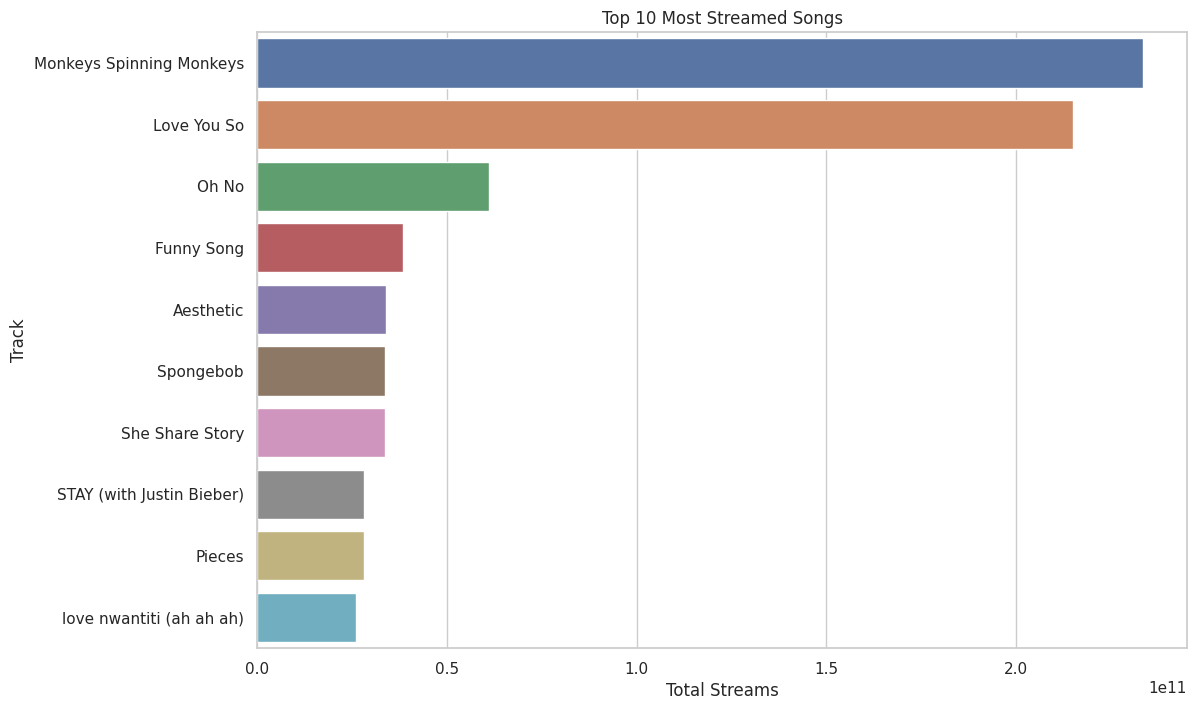

In [223]:
# Sort the data by 'Total Streams' in descending order and get the top 10 tracks
top_10_streamed_songs = data.nlargest(10, 'Total Streams')

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Streams', y='Track', data=top_10_streamed_songs, palette='deep')

# Add titles and labels
plt.title('Top 10 Most Streamed Songs')
plt.xlabel('Total Streams')
plt.ylabel('Track')

# Show the plot
plt.show()


#### **Insights** :
Viral Dominance: Viral tracks like "Monkeys Spinning Monkeys" and "Love You So" dominate the top streamed songs, indicating their widespread appeal and engagement.

Variety in Genres: The diversity of tracks, ranging from humorous songs to popular hits, reflects varied audience preferences.

Significant Streams: Even the lower-ranked tracks in the top 10 have substantial streams, each exceeding 500 million.

### Percentage Analysis of Spotify Playlist

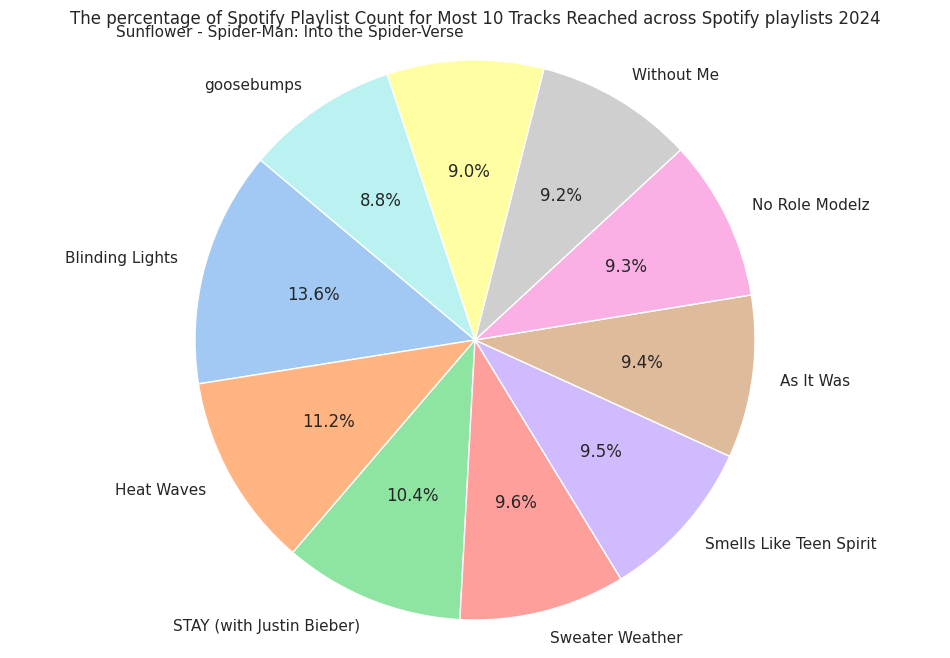

In [224]:
# Sort the data by 'Spotify Playlist Count' in descending order and get the top 10 tracks
top_10_tracks = data.nlargest(10, 'Spotify Playlist Count')

# Plotting the pie chart
plt.figure(figsize=(12, 8))
plt.pie(top_10_tracks['Spotify Playlist Count'], labels=top_10_tracks['Track'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))

# Add title
plt.title('The percentage of Spotify Playlist Count for Most 10 Tracks Reached across Spotify playlists 2024')

# Show the plot
plt.axis('equal')
plt.show()

#### **Insights** :
Dominance of "Blinding Lights": This track leads the playlist count percentage, indicating its widespread popularity.

Broad Range of Genres: The top tracks cover a wide range of genres, appealing to diverse listener preferences.

High Representation: All the top tracks have a significant presence in Spotify playlists, each appearing in at least 8.8% of playlists.

### Last 10 years Track Trend

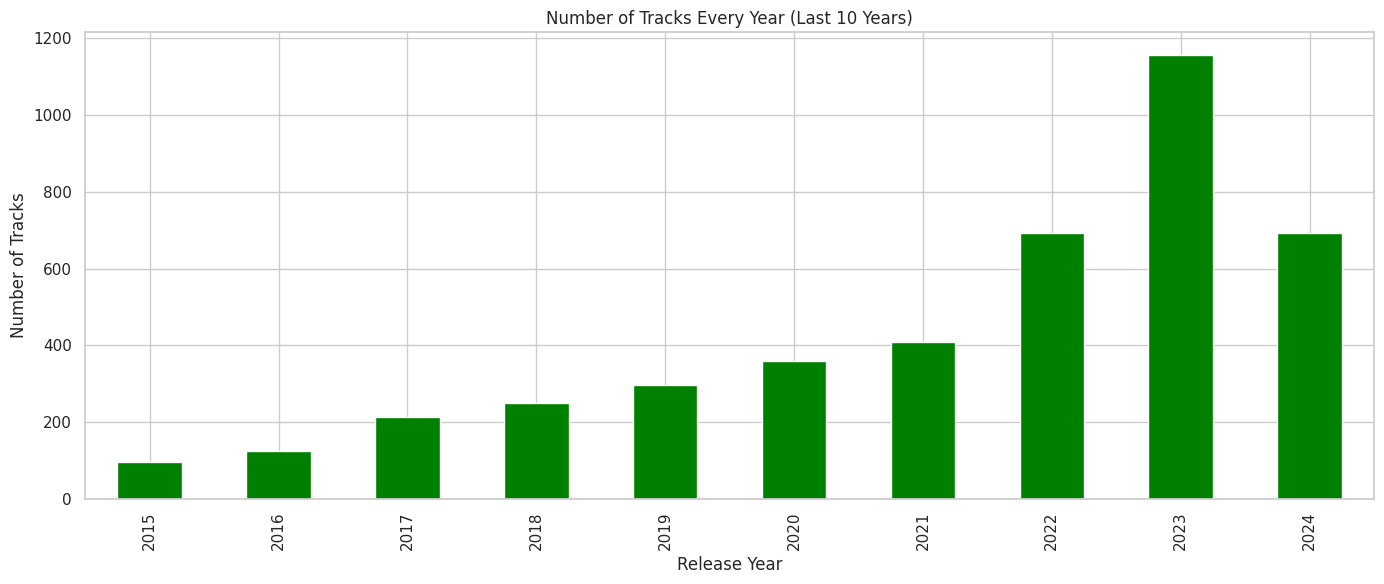

In [225]:
# Get the most recent year in the dataset
current_year = data['Release Year'].max()

# Filter the dataset for the last 10 release years
last_10_years_data = data[data['Release Year'] >= (current_year - 9)]

# Group by 'Release Year' and get the number of tracks for each year
tracks_per_year = last_10_years_data.groupby('Release Year')['Track'].count()

# Plot the number of tracks per year as a bar chart with a different color
plt.figure(figsize=(14, 6))
tracks_per_year.plot(kind='bar', color='green')
plt.title('Number of Tracks Every Year (Last 10 Years)')
plt.xlabel('Release Year')
plt.ylabel('Number of Tracks')
plt.tight_layout()
plt.show()



#### **Insights** :
Steady Growth: The number of tracks released has shown steady growth over the past decade, indicating increasing musical production and releases.

2023 Peak: The significant spike in 2023 suggests a peak in musical activity, which could be attributed to various factors such as increased artist productivity or changes in the music industry.

Recent Decline: The slight decrease in 2024 may indicate a stabilization or correction after the peak year.

### Most listened Song of 2024 on Spotify

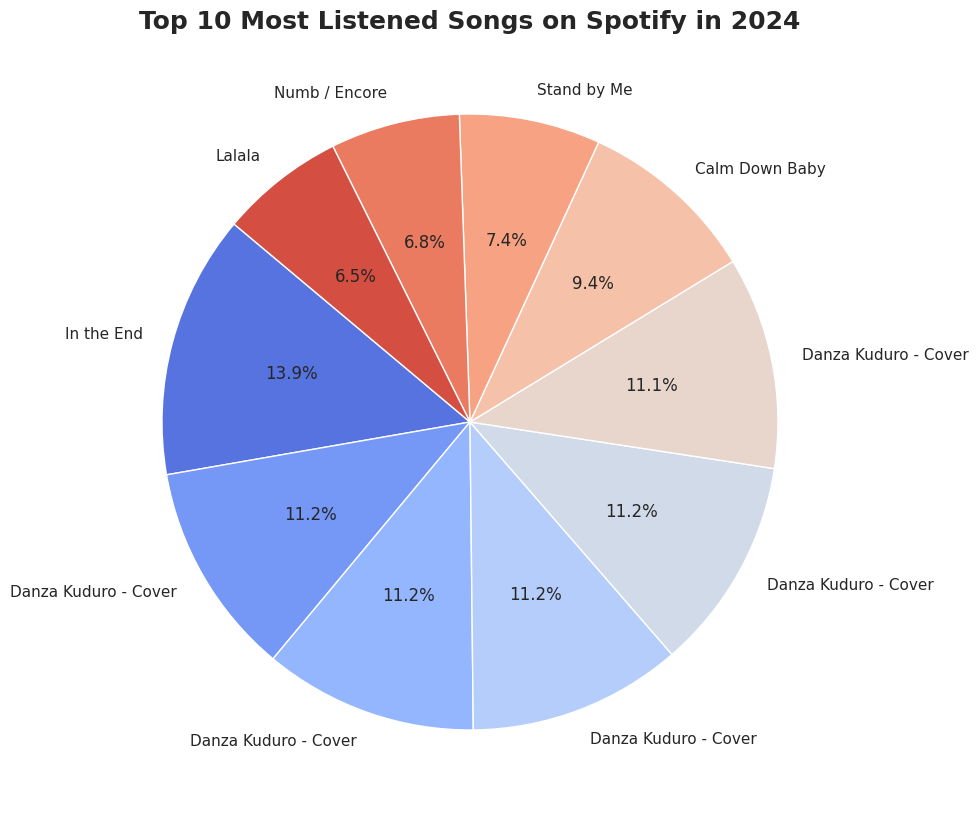

In [228]:
#Filter the data for songs released or listened to in 2024
data_2024 = data[data['Release Year'] == 2024]

# Sort the data by 'Spotify Streams' in descending order and get the top 10 tracks
top_10_spotify_streams_2024 = data_2024.nlargest(10, 'Spotify Streams')

# Create a pie chart for the top 10 tracks by Spotify Streams
plt.figure(figsize=(10, 10))
plt.pie(top_10_spotify_streams_2024['Spotify Streams'], labels=top_10_spotify_streams_2024['Track'],
        autopct='%1.1f%%', colors=sns.color_palette('coolwarm', n_colors=10), startangle=140)

# Add title
plt.title('Top 10 Most Listened Songs on Spotify in 2024', fontsize=18, fontweight='bold')

# Show the plot
plt.show()



#### **Insights** :
Dominance of "In the End": This song leads the chart with the highest percentage of listens, indicating its enduring popularity.

Popularity of "Danza Kuduro" Covers: Multiple versions of "Danza Kuduro" collectively make up a large portion of the top 10, highlighting the song's broad appeal.

Variety of Genres: The list includes a mix of classic hits, contemporary tracks, and multiple covers, reflecting diverse listener preferences.

### Album released in 2024 by total streams

<ipython-input-229-a1b2af0f13ba>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Album Name', y='Total Streams', data=top_10_albums_2024, palette='deep')


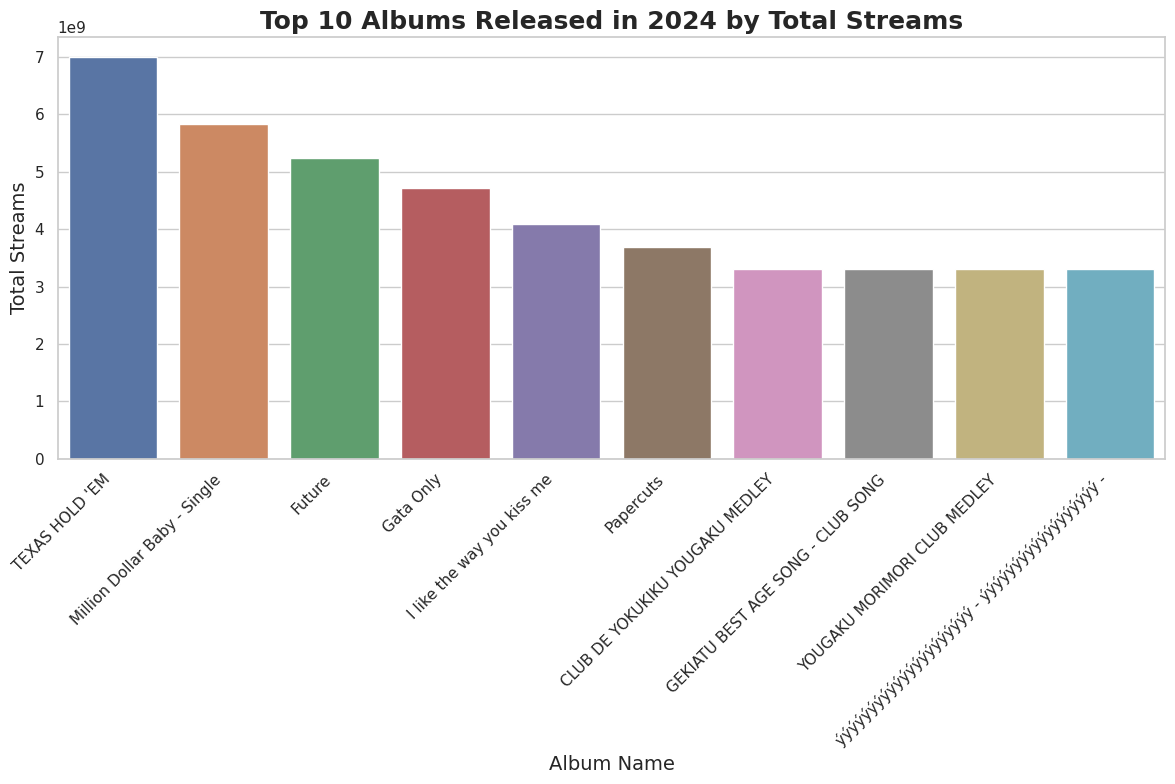

In [229]:
# Filter the data for albums released in 2024
albums_2024 = data[data['Release Year'] == 2024]

# Sort the data by 'Total Streams' in descending order and get the top 10 albums
top_10_albums_2024 = albums_2024.nlargest(10, 'Total Streams')

# Create a vertical bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Album Name', y='Total Streams', data=top_10_albums_2024, palette='deep')

# Add titles and labels
plt.title('Top 10 Albums Released in 2024 by Total Streams', fontsize=18, fontweight='bold')
plt.xlabel('Album Name', fontsize=14)
plt.ylabel('Total Streams', fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()



#### **Insights** :
Dominance of "TEXAS HOLD 'EM": This album stands out significantly with the highest number of streams, indicating strong listener engagement and popularity.

High Streaming Numbers for Singles and Medleys: Several singles and medley albums are in the top 10, showing a preference for these types of releases.

Diverse Album Titles: The variety in album names suggests a wide range of genres and themes that appealed to listeners in 2024.

### Artists by Total Streams in 2024

<ipython-input-230-a4e1b28dc563>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Artist', y='Total Streams', data=top_10_artists_2024, palette='pastel')


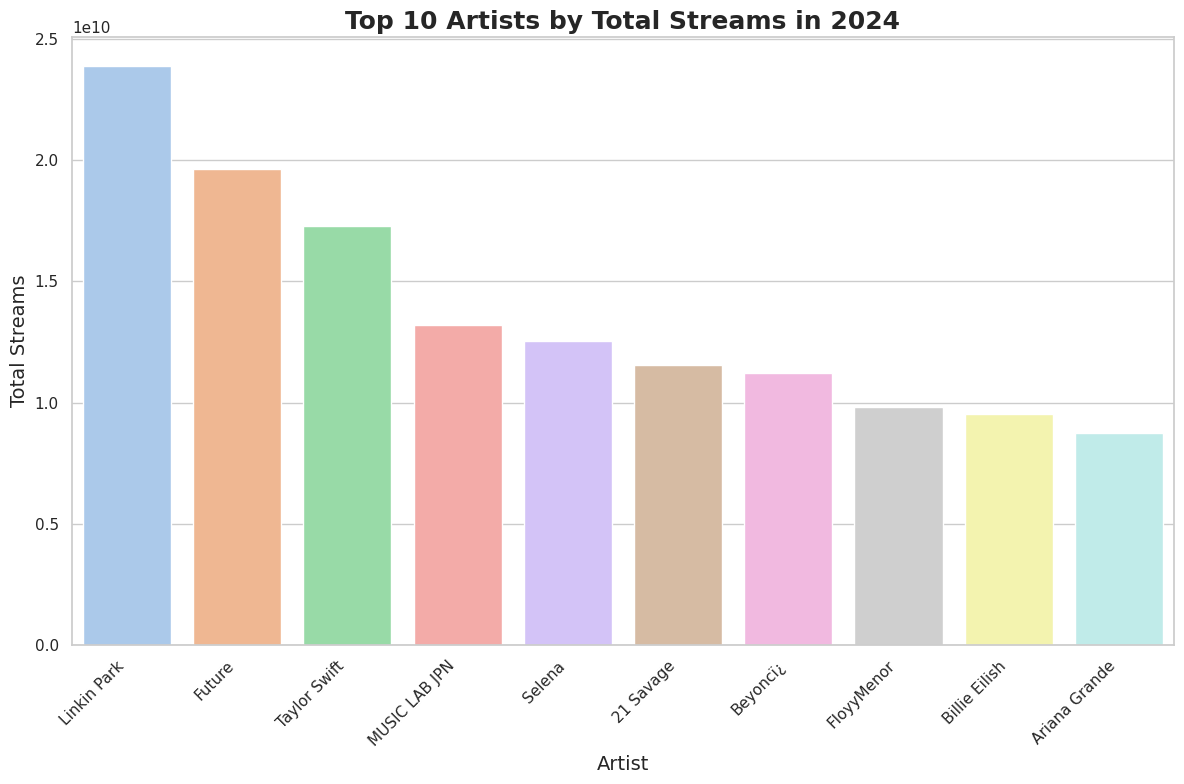

In [230]:
# Filter the data for tracks released in 2024
tracks_2024 = data[data['Release Year'] == 2024]

# Group by artist and sum the total streams
top_artists_2024 = tracks_2024.groupby('Artist')['Total Streams'].sum().reset_index()

# Sort by total streams and get the top 10 artists
top_10_artists_2024 = top_artists_2024.nlargest(10, 'Total Streams')

# Create a vertical bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Artist', y='Total Streams', data=top_10_artists_2024, palette='pastel')

# Add titles and labels
plt.title('Top 10 Artists by Total Streams in 2024', fontsize=18, fontweight='bold')
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Total Streams', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()


#### **Insights** :
Dominance of Linkin Park: This band leads significantly, showing a resurgence or continued strong fan base.

Diverse Range of Artists: The list includes a variety of genres and styles, from Future's rap to Taylor Swift's pop, and Billie Eilish's alternative music.

Strong Streaming Numbers: All artists in the top 10 have over 1 billion streams, indicating a high level of engagement across different fan bases.

### Albums Released Each Month in 2024

  Release Date  Release Month  Release Year
0   2024-04-26              4          2024
1   2024-05-04              5          2024
2   2024-03-19              3          2024
3   2023-01-12              1          2023
4   2024-05-31              5          2024


<ipython-input-231-dbb595e2d87a>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Release Month', y='Album Count', data=albums_per_month_2024, palette='deep')


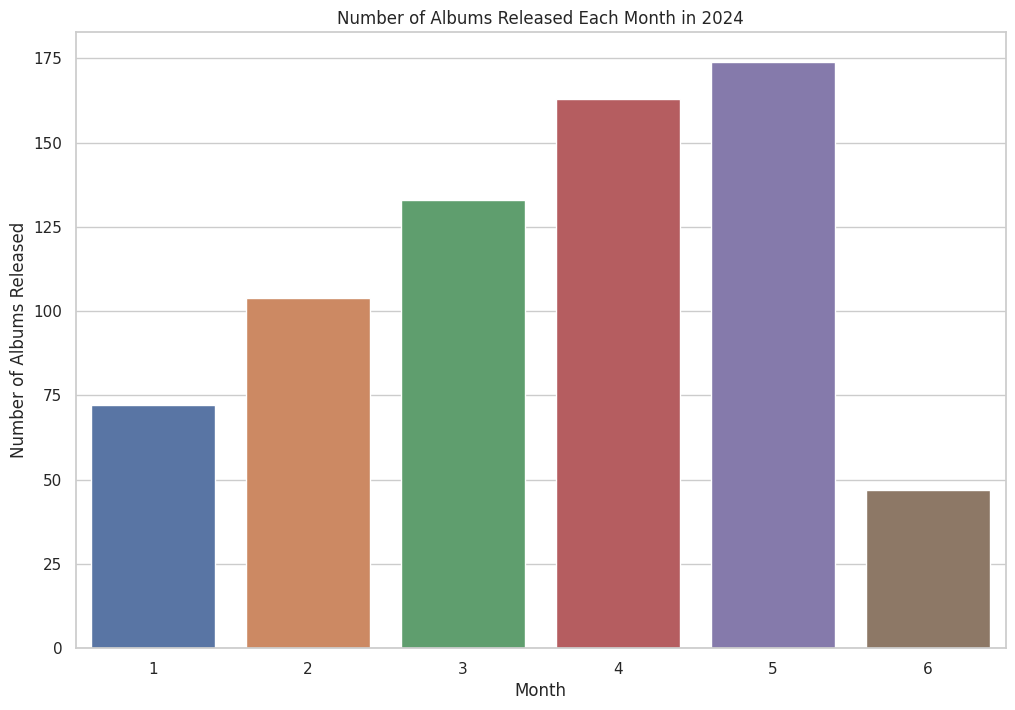

In [231]:
# Extract the month and year from the release date
data['Release Month'] = data['Release Date'].dt.month
data['Release Year'] = data['Release Date'].dt.year

# Display the updated DataFrame with the new columns (optional)
print(data[['Release Date', 'Release Month', 'Release Year']].head())

# Filter the data for albums released in 2024
albums_2024 = data[data['Release Year'] == 2024]

# Count the number of albums released each month in 2024
albums_per_month_2024 = albums_2024['Release Month'].value_counts().reset_index()
albums_per_month_2024.columns = ['Release Month', 'Album Count']
albums_per_month_2024 = albums_per_month_2024.sort_values('Release Month')

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Release Month', y='Album Count', data=albums_per_month_2024, palette='deep')

# Add titles and labels
plt.title('Number of Albums Released Each Month in 2024')
plt.xlabel('Month')
plt.ylabel('Number of Albums Released')

# Show the plot
plt.show()


#### **Insights** :
 Peak Release Period: The peak period for album releases is in May, indicating a possible strategic time for artists and labels to release new music.

Spring Releases: March, April, and May collectively are significant months for new album releases, making the spring season a key time for the music industry.

Summer Decline: There is a noticeable decline in album releases in June, which could be due to various factors such as marketing strategies or seasonal preferences.

## Multivariate Analysis

### Pairplot Analysis

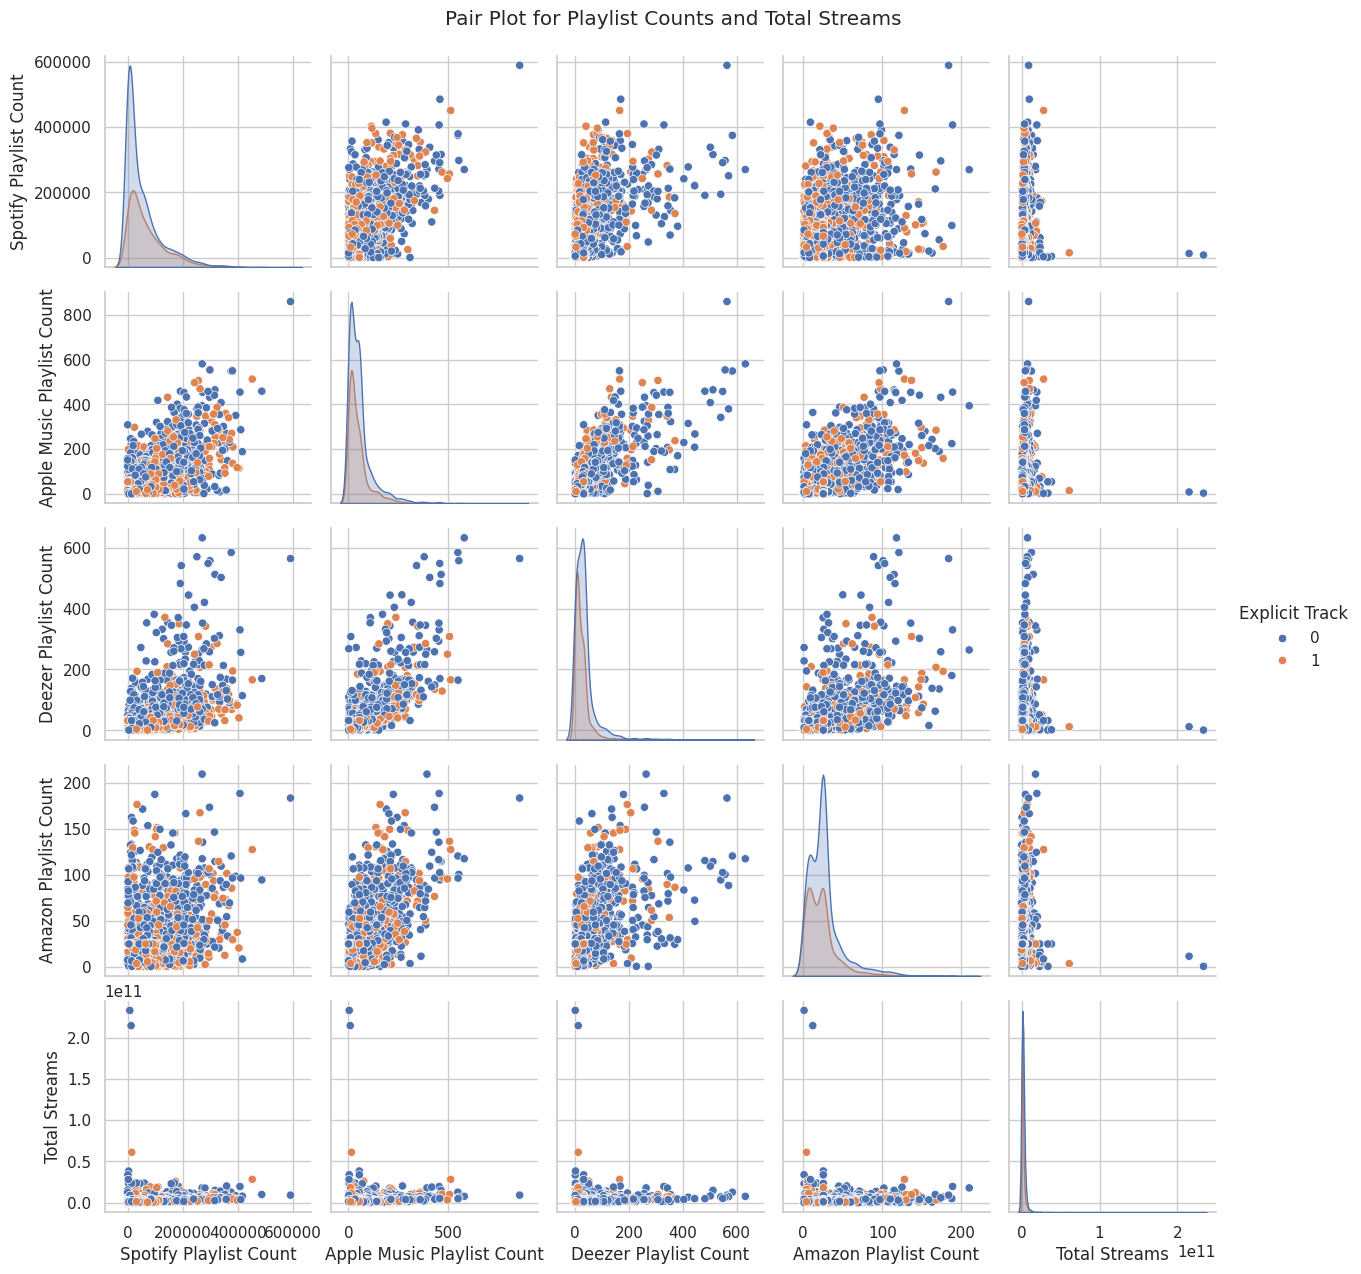

In [232]:
# Select relevant columns for the pair plot including hue
selected_columns = ['Spotify Playlist Count', 'Apple Music Playlist Count', 'Deezer Playlist Count', 'Amazon Playlist Count', 'Total Streams', 'Explicit Track']
pairplot_data = data[selected_columns]

# Create a pair plot with hue
sns.pairplot(pairplot_data, hue='Explicit Track')

# Add a title
plt.suptitle('Pair Plot for Playlist Counts and Total Streams', y=1.02)

# Show the plot
plt.show()


#### **Insighst** :
Non-explicit Tracks Dominance: Non-explicit tracks tend to have higher playlist counts and total streams across all platforms.

Platform Correlations: There are positive correlations between playlist counts on different platforms, indicating that popular tracks tend to be popular across multiple services.

Explicit Tracks: Explicit tracks generally have lower playlist counts and total streams.

## **Conclusion** :
Non-explicit tracks dominate top positions in streams and likes.

Artists like Bad Bunny, Doja Cat, Drake, and Kreepa are popular with explicit tracks.

Diverse representation of genres and content types across top artists.

Drake has the highest total playlist count, with Bad Bunny, The Weeknd, and Travis Scott also highly popular.

Peak album release period is in May, with significant releases in March, April, and May.

Noticeable decline in album releases in June.

Positive correlations between playlist counts on different platforms.

Non-explicit tracks have higher playlist counts and total streams across all platforms.

Explicit tracks generally have lower playlist counts and total streams.

## Hypothesis Testing

### Hypothesis:
Null Hypothesis (H₀): There is no significant difference in the average Spotify Streams between songs released in the first half of the year (control_group) and songs released in the second half (test_group).

Alternative Hypothesis (H₁): There is a significant difference in the average Spotify Streams between songs released in the first half of the year (control_group) and songs released in the second half (test_group).

In [233]:
# Define the control group: songs released in the first half of the year (Jan-Jun)
control_group = data[data['Release Month'].between(1, 6)]['Spotify Streams']

# Define the test group: songs released in the second half of the year (Jul-Dec)
test_group = data[data['Release Month'].between(7, 12)]['Spotify Streams']


In [234]:
# Calculate the mean and standard deviation of the control group and round to 2 decimal places
control_mean = control_group.mean().round(2)
control_std = control_group.std().round(2)

# Calculate the mean and standard deviation of the test group and round to 2 decimal places
test_mean = test_group.mean().round(2)
test_std = test_group.std().round(2)

# Output the calculated mean and standard deviation of each group
print("Control Group (Jan-Jun) - Mean:", control_mean, ", Std Dev:", control_std)
print("Test Group (Jul-Dec) - Mean:", test_mean, ", Std Dev:", test_std)


Control Group (Jan-Jun) - Mean: 443304288.76 , Std Dev: 539488966.86
Test Group (Jul-Dec) - Mean: 452888356.34 , Std Dev: 521648437.93


In [235]:
# Calculate the sample size of each group
n_control = len(control_group)
n_test = len(test_group)

# Calculate the variance of each group divided by its sample size
a = (control_std**2) / n_control
b = (test_std**2) / n_test

# Calculate the Z-score using the difference in means and the combined standard error
Z_score = (control_mean - test_mean) / np.sqrt(a + b)

# Output the calculated Z-score
print(f"Manual Z-score: {Z_score}")


Manual Z-score: -0.6074441007927424


In [236]:
# Set the significance level
alpha = 0.05

# Calculate the critical Z value for a two-tailed test at the specified significance level
critical_z_value = st.norm.ppf(1 - alpha / 2)

# Output the calculated critical Z value
print(f"Critical Z value: {critical_z_value}")


Critical Z value: 1.959963984540054


In [237]:
if Z_score > critical_z_value:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")


Fail to reject the null hypothesis: There is no significant difference between the groups.


In [238]:
p_value = 1 - st.norm.cdf(Z_score)
print(f"Manual Z-test P-value: {p_value}")

Manual Z-test P-value: 0.7282218855296727


In [239]:
# Perform the Z-test using statsmodels
z_statistic, p_value = sm.stats.ztest(control_group, test_group, alternative='two-sided')
print(f"Statsmodels Z-statistic: {z_statistic}, P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")


Statsmodels Z-statistic: -0.6045106060948889, P-value: 0.5455042199423451
Fail to reject the null hypothesis: There is no significant difference between the groups.


### Conclusions :
Since the absolute value of the Z-score does not exceed the critical Z value and the p-value is greater than the significance level, we fail to reject the null hypothesis H0.This means that there is not enough evidence to conclude that there is a significant difference in the average Spotify Streams between songs released in the first half of the year (Group A) and songs released in the second half (Group B).

This conclusion is supported by both the manual calculations and the statsmodels results, which align closely and indicate no strong statistical difference between the two groups of songs released in the first and second halves of the year.